# 유사 음원 찾기
### 데이터셋 구성
* 원곡과 표절, 표절의혹, 샘플링, 리메이크 음원 각각 선정 => 총 14곡(Test 데이터)
* 아마추어 작곡가들이 만든 2분 이내의 음원(출처 : 사이디라이트) => 총 2322곡

### 진행 방안
* 음원 특성 추출 후 음원간 유사도 측정 및 비교
* Test 데이터 내 유사곡들의 유사도 Score를 정의
* 다양한 특성 추출 및 분석 방법론 적용 케이스별 유사도 Score 개선여부 테스트

### 음원 특성 추출 및 유사도 비교
### &nbsp; Part 1. 유클리드 거리, 코사인 유사도, 피어슨 유사도
* 음원별 특성 추출 후, 벡터간 유사도 측정
* 추출 특성 => Tempo 1개, Chroma 72개, MFCC 39개

### &nbsp; Part 2. K-Means, DBSCAN

### &nbsp; Part 3. Mel Spectrogram 기반 딥러닝 활용

### 종합

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import random
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm
from matplotlib import rc

# rc('font', family='Arial Unicode MS')

warnings.filterwarnings(action='ignore')

In [ ]:
# # 폰트 설치(코랩)
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
# # 한글 설정
# rc('font', family='NanumBarunGothic')

In [2]:
DIR_PATH = "/content/drive/MyDrive/ds_study/DL_project2/"

SAMPLING_RATE = 44100

TEST_MUSIC = 14 # Test 데이터 Music 총 개수
SAMPLE_MUSIC = 500 # 비교용 샘플 Music 랜덤 추출 개수

START_INDEX = 0 # 데이터프레임에서 조회할 음원 index 기본 범위 설정
END_INDEX = 9999 # 데이터프레임에서 조회할 음원 index 기본 범위 설정

#### mp3파일 경로 데이터프레임 생성

In [ ]:
# music_paths = glob.glob(DIR_PATH + "data/*.mp3")
# music_paths[:5]

In [ ]:
# total_music_paths = pd.DataFrame(music_paths, columns=["Path"])
# total_music_paths.head()

In [ ]:
# total_music_paths.to_csv(DIR_PATH + 'music_paths.csv', index=False) # csv 파일로 저장

In [3]:
total_music_paths = pd.read_csv(DIR_PATH + 'music_paths.csv')
total_music_paths.head()

,Path
0,/content/drive/MyDrive/ds_study/DL_project2/da...
1,/content/drive/MyDrive/ds_study/DL_project2/da...
2,/content/drive/MyDrive/ds_study/DL_project2/da...
3,/content/drive/MyDrive/ds_study/DL_project2/da...
4,/content/drive/MyDrive/ds_study/DL_project2/da...


In [4]:
total_music_paths.shape

(2341, 1)

#### 음원 구간별 파일 정보 저장 => "total_music_paths_trim"

In [5]:
total_music_paths_trim = pd.read_csv(DIR_PATH + 'trim_audio_label_v1.csv')
total_music_paths_trim.head()

,file name,original file,label,order
0,1635994364508_862a7b71f7a80b2e5550ed718e332866...,1635994364508_862a7b71f7a80b2e5550ed718e332866...,music1,1
1,1635994364508_862a7b71f7a80b2e5550ed718e332866...,1635994364508_862a7b71f7a80b2e5550ed718e332866...,music1,2
2,1635994364508_862a7b71f7a80b2e5550ed718e332866...,1635994364508_862a7b71f7a80b2e5550ed718e332866...,music1,3
3,1635994364508_862a7b71f7a80b2e5550ed718e332866...,1635994364508_862a7b71f7a80b2e5550ed718e332866...,music1,4
4,1635994365521_2b1d9fe10b3d9119470e8e9fb4e20872...,1635994365521_2b1d9fe10b3d9119470e8e9fb4e20872...,music2,1


In [6]:
total_music_paths_trim.shape

(5898, 4)

In [7]:
total_music_paths_trim['Path'] = DIR_PATH + 'data/trim/' + total_music_paths_trim['file name']
total_music_paths_trim.head()

,file name,original file,label,order,Path
0,1635994364508_862a7b71f7a80b2e5550ed718e332866...,1635994364508_862a7b71f7a80b2e5550ed718e332866...,music1,1,/content/drive/MyDrive/ds_study/DL_project2/da...
1,1635994364508_862a7b71f7a80b2e5550ed718e332866...,1635994364508_862a7b71f7a80b2e5550ed718e332866...,music1,2,/content/drive/MyDrive/ds_study/DL_project2/da...
2,1635994364508_862a7b71f7a80b2e5550ed718e332866...,1635994364508_862a7b71f7a80b2e5550ed718e332866...,music1,3,/content/drive/MyDrive/ds_study/DL_project2/da...
3,1635994364508_862a7b71f7a80b2e5550ed718e332866...,1635994364508_862a7b71f7a80b2e5550ed718e332866...,music1,4,/content/drive/MyDrive/ds_study/DL_project2/da...
4,1635994365521_2b1d9fe10b3d9119470e8e9fb4e20872...,1635994365521_2b1d9fe10b3d9119470e8e9fb4e20872...,music2,1,/content/drive/MyDrive/ds_study/DL_project2/da...


In [ ]:
total_music_paths_trim.to_csv(DIR_PATH + f'test_data/df_total_path_trim.csv', index=False) # csv 파일로 저장

In [8]:
total_music_paths_trim = pd.read_csv(DIR_PATH + f'test_data/df_total_path_trim.csv') # csv 파일 불러오기
total_music_paths_trim.shape

(5898, 5)

In [ ]:
# test1
ipd.Audio(total_music_paths_trim.loc[0, 'Path'], rate=SAMPLING_RATE)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
ipd.Audio(total_music_paths_trim.loc[1, 'Path'], rate=SAMPLING_RATE)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
ipd.Audio(total_music_paths_trim.loc[2, 'Path'], rate=SAMPLING_RATE)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
ipd.Audio(total_music_paths_trim.loc[3, 'Path'], rate=SAMPLING_RATE)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
ipd.Audio(DIR_PATH + 'data/' + total_music_paths_trim.loc[0, 'original file'] + '.mp3', rate=SAMPLING_RATE)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# test2
ipd.Audio(total_music_paths_trim.loc[6, 'Path'], rate=SAMPLING_RATE)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
ipd.Audio(total_music_paths_trim.loc[7, 'Path'], rate=SAMPLING_RATE)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
ipd.Audio(total_music_paths_trim.loc[8, 'Path'], rate=SAMPLING_RATE)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
ipd.Audio(DIR_PATH + 'data/' + total_music_paths_trim.loc[6, 'original file'] + '.mp3', rate=SAMPLING_RATE)

Output hidden; open in https://colab.research.google.com to view.

# 음원 특성 관련 Chroma 시각화 및 검토

In [9]:
import librosa
import librosa.display
import IPython.display as ipd

In [10]:
# chromagram 시각화 함수 정의 => 'stft', 'cqt', 'cens' 옵션별 출력
def show_chromagram(music, sr, type='stft'):
  if type == 'cqt':
    chroma = librosa.feature.chroma_cqt(music, sr)
  elif type == 'cens':
    chroma = librosa.feature.chroma_cens(music, sr)
  elif type == 'stft':
    chroma = librosa.feature.chroma_stft(music, sr)
  else:
    print('type error')
    return

  seconds = len(music)/SAMPLING_RATE

  plt.figure(figsize=(15,5))
  librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma')
  plt.colorbar()
  plt.tight_layout()
  plt.xlabel('time')
  plt.ylabel('pitch class')
  plt.xticks(np.arange(0, seconds, seconds//10)) # 좌표간격 설정
  plt.show()

In [11]:
# 테스트용 음원 load
music, sr = librosa.load(total_music_paths.loc[0, 'Path'], sr=SAMPLING_RATE, duration=None)

In [12]:
# 테스트용 음원(trim) load
music_trim, sr_trim = librosa.load(total_music_paths_trim.loc[0, 'Path'], sr=SAMPLING_RATE, duration=None)

#### chroma_stft

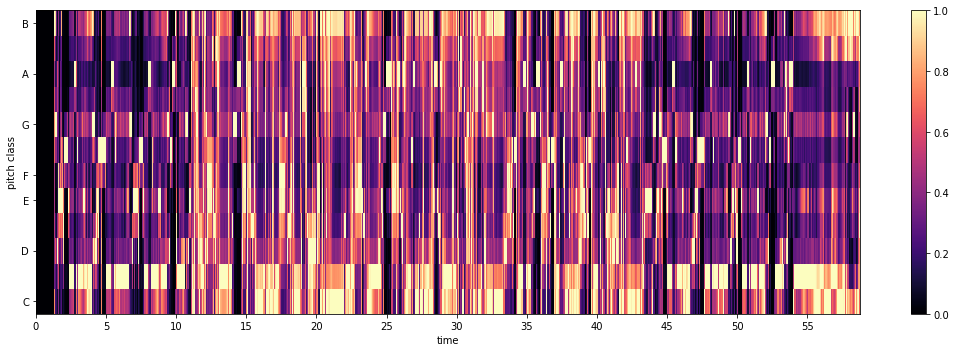

In [ ]:
show_chromagram(music, sr, 'stft')

#### chroma_cqt

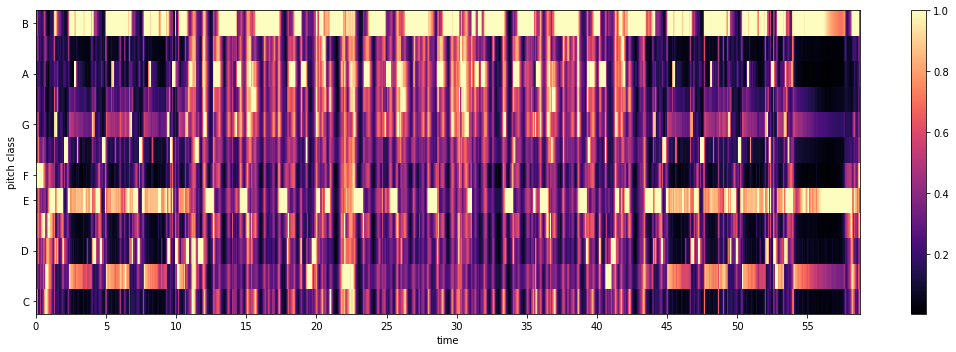

In [ ]:
show_chromagram(music, sr, 'cqt')

#### chroma_cens

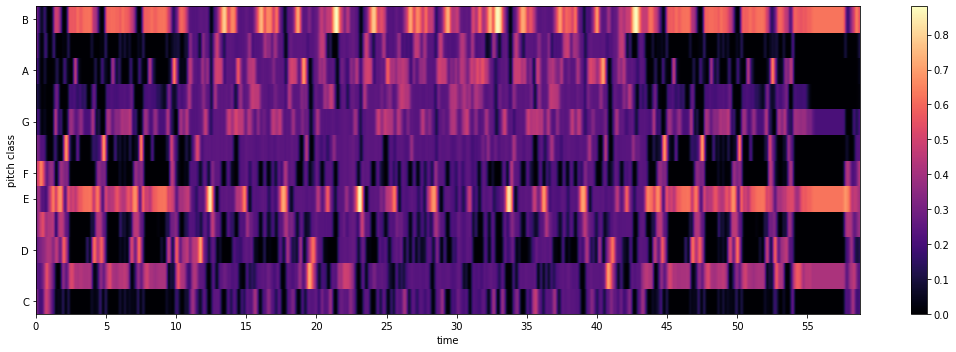

In [ ]:
show_chromagram(music, sr, 'cens')

> 12음계를 기반으로 위 3가지가 각각의 음원 특성을 나타내는 것을 확인함

# 데이터셋 구성

In [13]:
# 원곡 및 유사곡 위주의 Test 데이터 파일정보 생성
test_data = pd.read_excel(DIR_PATH + 'test_data/test_data_list.xlsx', index_col=0)
test_data

,Music,Path
1,더더 - It’s you,/content/drive/MyDrive/ds_study/DL_project2/te...
2,MC몽 - 너에게 쓰는 편지,/content/drive/MyDrive/ds_study/DL_project2/te...
3,와이낫 - 파랑새,/content/drive/MyDrive/ds_study/DL_project2/te...
4,씨엔블루 - 외톨이야,/content/drive/MyDrive/ds_study/DL_project2/te...
5,요시마타 료 - Resolver,/content/drive/MyDrive/ds_study/DL_project2/te...
6,FTISLAND - 사랑앓이,/content/drive/MyDrive/ds_study/DL_project2/te...
7,TLC - No Scrubs,/content/drive/MyDrive/ds_study/DL_project2/te...
8,Ed Sheeran - Shape of you,/content/drive/MyDrive/ds_study/DL_project2/te...
9,Harold Faltermeyer - Axel F,/content/drive/MyDrive/ds_study/DL_project2/te...
10,싸이 - 챔피언,/content/drive/MyDrive/ds_study/DL_project2/te...


In [14]:
test_data_trim = pd.DataFrame(columns=['file name', 'original file', 'label', 'order', 'Path'])
test_data_trim['Path'] = glob.glob(DIR_PATH + 'test_data/trim/*.wav')
test_data_trim.head()

,file name,original file,label,order,Path
0,NaN,NaN,NaN,NaN,/content/drive/MyDrive/ds_study/DL_project2/te...
1,NaN,NaN,NaN,NaN,/content/drive/MyDrive/ds_study/DL_project2/te...
2,NaN,NaN,NaN,NaN,/content/drive/MyDrive/ds_study/DL_project2/te...
3,NaN,NaN,NaN,NaN,/content/drive/MyDrive/ds_study/DL_project2/te...
4,NaN,NaN,NaN,NaN,/content/drive/MyDrive/ds_study/DL_project2/te...


In [ ]:
file_name_list = []
original_file_list = []
label_list = []
order_list = []

for idx, row in test_data_trim.iterrows():
  file_name = row['Path'].split('/')[-1]
  directory_num = int(file_name.split('_')[0])
  type_str = file_name.split('_')[1]
  order = int(file_name.split('_')[-1].split('.')[0]) + 1

  if type_str == 'org':
    original_file = test_data.loc[directory_num*2-1, 'Path'].split('/')[-1].split('.')[0]
    label = test_data.loc[directory_num*2-1, 'Music']
  else:
    original_file = test_data.loc[directory_num*2, 'Path'].split('/')[-1].split('.')[0]
    label = test_data.loc[directory_num*2, 'Music']

  # print(file_name, directory_num, type_str, order)
  file_name_list.append(file_name)
  original_file_list.append(original_file)
  label_list.append(label)
  order_list.append(order)

test_data_trim['file name'] = file_name_list
test_data_trim['original file'] = original_file_list
test_data_trim['label'] = label_list
test_data_trim['order'] = order_list

In [ ]:
test_data_trim.head()

,file name,original file,label,order,Path
0,1_org_0.wav,It's You_더더(THETHE)_The One & The Other,더더 - It’s you,1,/content/drive/MyDrive/ds_study/DL_project2/te...
1,1_org_1.wav,It's You_더더(THETHE)_The One & The Other,더더 - It’s you,2,/content/drive/MyDrive/ds_study/DL_project2/te...
2,1_org_2.wav,It's You_더더(THETHE)_The One & The Other,더더 - It’s you,3,/content/drive/MyDrive/ds_study/DL_project2/te...
3,1_org_3.wav,It's You_더더(THETHE)_The One & The Other,더더 - It’s you,4,/content/drive/MyDrive/ds_study/DL_project2/te...
4,1_org_4.wav,It's You_더더(THETHE)_The One & The Other,더더 - It’s you,5,/content/drive/MyDrive/ds_study/DL_project2/te...


In [ ]:
# 샘플 Music 랜덤 추출
random.seed(42)

sample_index = random.sample(range(len(total_music_paths)), SAMPLE_MUSIC) # SAMPLE_MUSIC : 추출 개수
sample_index.sort()

sample_music = total_music_paths.loc[sample_index, :]
sample_music["Music"] = [f'Music_{idx}' for idx in sample_music.index]
sample_music = sample_music[['Music', 'Path']]
sample_music.head()

,Music,Path
2,Music_2,/content/drive/MyDrive/ds_study/DL_project2/da...
3,Music_3,/content/drive/MyDrive/ds_study/DL_project2/da...
7,Music_7,/content/drive/MyDrive/ds_study/DL_project2/da...
8,Music_8,/content/drive/MyDrive/ds_study/DL_project2/da...
13,Music_13,/content/drive/MyDrive/ds_study/DL_project2/da...


#### Total_trim 데이터프레임 생성 => "df_total_trim_v0"

In [ ]:
# Test 데이터 및 전체 Music 데이터 합치기 => Total 데이터 "df_total_trim_v0" 생성
df_total_trim_v0 = pd.concat([test_data_trim, total_music_paths_trim])
df_total_trim_v0.reset_index(drop=True, inplace=True)
df_total_trim_v0.head()

,file name,original file,label,order,Path
0,1_org_0.wav,It's You_더더(THETHE)_The One & The Other,더더 - It’s you,1,/content/drive/MyDrive/ds_study/DL_project2/te...
1,1_org_1.wav,It's You_더더(THETHE)_The One & The Other,더더 - It’s you,2,/content/drive/MyDrive/ds_study/DL_project2/te...
2,1_org_2.wav,It's You_더더(THETHE)_The One & The Other,더더 - It’s you,3,/content/drive/MyDrive/ds_study/DL_project2/te...
3,1_org_3.wav,It's You_더더(THETHE)_The One & The Other,더더 - It’s you,4,/content/drive/MyDrive/ds_study/DL_project2/te...
4,1_org_4.wav,It's You_더더(THETHE)_The One & The Other,더더 - It’s you,5,/content/drive/MyDrive/ds_study/DL_project2/te...


In [ ]:
df_total_trim_v0.tail()

,file name,original file,label,order,Path
6034,1635985157096_435832d28265fcba7cb7eed70fd10ada...,1635985157096_435832d28265fcba7cb7eed70fd10ada...,music2321,2,/content/drive/MyDrive/ds_study/DL_project2/da...
6035,1635985157096_435832d28265fcba7cb7eed70fd10ada...,1635985157096_435832d28265fcba7cb7eed70fd10ada...,music2321,3,/content/drive/MyDrive/ds_study/DL_project2/da...
6036,1635985163517_f26217cc824086f20d9a9ccaf37ca2d3...,1635985163517_f26217cc824086f20d9a9ccaf37ca2d3...,music2322,1,/content/drive/MyDrive/ds_study/DL_project2/da...
6037,1635985163517_f26217cc824086f20d9a9ccaf37ca2d3...,1635985163517_f26217cc824086f20d9a9ccaf37ca2d3...,music2322,2,/content/drive/MyDrive/ds_study/DL_project2/da...
6038,1635985163517_f26217cc824086f20d9a9ccaf37ca2d3...,1635985163517_f26217cc824086f20d9a9ccaf37ca2d3...,music2322,3,/content/drive/MyDrive/ds_study/DL_project2/da...


# Part 1. 유클리드 거리, 코사인 유사도, 피어슨 유사도

## 음원 특성 추출 및 유사도 비교(1차)
* 추출 특성 : Tempo 1개, Chroma 72개
* 유사도 기준 : 유클리드 거리, 코사인 유사도, 피어슨 유사도

## 음원 특성 추출

In [15]:
# 음원 특성 추출 함수 정의(v1)
def get_features_v1(df, duration=None, offset=0.0, start_idx=START_INDEX, end_idx=END_INDEX):
  df_copy = df.copy() # 데이터프레임 복사본 생성

  for idx, row in tqdm(df_copy.iterrows()):
    # index 범위 확인
    if idx < start_idx or idx > end_idx:
      continue

    # 음원 load
    music_path = row['Path']
    music, sr = librosa.load(music_path, sr=SAMPLING_RATE, duration=duration, offset=offset) # 옵션값 기준 구간 설정

    # 템포 저장
    df_copy.loc[idx, 'Tempo'] = librosa.beat.tempo(music, sr=sr)

    # # zero_crossings 저장 => 적용 제외
    # df_copy.loc[idx, 'Zero_crossings'] = sum(librosa.zero_crossings(music, pad=False))

    # chroma_stft 12음계별 평균 및 분산 산출 후 저장
    chroma_stft_raw = librosa.feature.chroma_stft(music, sr)
    for i, values in enumerate(chroma_stft_raw):
      df_copy.loc[idx, f'Chroma_stft{i+1}_mean'] = values.mean() # 평균
      df_copy.loc[idx, f'Chroma_stft{i+1}_var'] = values.var() # 분산
    
    # chroma_cqt 12음계별 평균 및 분산 산출 후 저장
    chroma_cqt_raw = librosa.feature.chroma_cqt(music, sr)
    for i, values in enumerate(chroma_cqt_raw):
      df_copy.loc[idx, f'Chroma_cqt{i+1}_mean'] = values.mean() # 평균
      df_copy.loc[idx, f'Chroma_cqt{i+1}_var'] = values.var() # 분산
    
    # chroma_cens 12음계별 평균 및 분산 산출 후 저장
    chroma_cens_raw = librosa.feature.chroma_cens(music, sr)
    for i, values in enumerate(chroma_cens_raw):
      df_copy.loc[idx, f'Chroma_cens{i+1}_mean'] = values.mean() # 평균
      df_copy.loc[idx, f'Chroma_cens{i+1}_var'] = values.var() # 분산
  
  return df_copy

In [16]:
# 전체 컬럼 스케일링 함수 정의
def get_norm(df, type='mms', start_col='Tempo'):
  df_copy = df.copy()

  if type == 'mms':
    scaler = MinMaxScaler()
  elif type == 'ss':
    scaler = StandardScaler()
  else:
    print('type error')
    return

  df_copy.loc[:, start_col:] = scaler.fit_transform(df_copy.loc[:, start_col:])
  
  return df_copy

#### 음원 특성 추출 결과 저장 => "df_total_trim_v1"

In [ ]:
df_total_trim_v1 = get_features_v1(df_total_trim_v0)

0it [00:00, ?it/s]

In [ ]:
df_total_trim_v1.head()

,Music,Path,Tempo,Chroma_stft1_mean,Chroma_stft1_var,Chroma_stft2_mean,Chroma_stft2_var,Chroma_stft3_mean,Chroma_stft3_var,Chroma_stft4_mean,Chroma_stft4_var,Chroma_stft5_mean,Chroma_stft5_var,Chroma_stft6_mean,Chroma_stft6_var,Chroma_stft7_mean,Chroma_stft7_var,Chroma_stft8_mean,Chroma_stft8_var,Chroma_stft9_mean,Chroma_stft9_var,Chroma_stft10_mean,Chroma_stft10_var,Chroma_stft11_mean,Chroma_stft11_var,Chroma_stft12_mean,Chroma_stft12_var,Chroma_cqt1_mean,Chroma_cqt1_var,Chroma_cqt2_mean,Chroma_cqt2_var,Chroma_cqt3_mean,Chroma_cqt3_var,Chroma_cqt4_mean,Chroma_cqt4_var,Chroma_cqt5_mean,Chroma_cqt5_var,Chroma_cqt6_mean,Chroma_cqt6_var,Chroma_cqt7_mean,Chroma_cqt7_var,Chroma_cqt8_mean,Chroma_cqt8_var,Chroma_cqt9_mean,Chroma_cqt9_var,Chroma_cqt10_mean,Chroma_cqt10_var,Chroma_cqt11_mean,Chroma_cqt11_var,Chroma_cqt12_mean,Chroma_cqt12_var,Chroma_cens1_mean,Chroma_cens1_var,Chroma_cens2_mean,Chroma_cens2_var,Chroma_cens3_mean,Chroma_cens3_var,Chroma_cens4_mean,Chroma_cens4_var,Chroma_cens5_mean,Chroma_cens5_var,Chroma_cens6_mean,Chroma_cens6_var,Chroma_cens7_mean,Chroma_cens7_var,Chroma_cens8_mean,Chroma_cens8_var,Chroma_cens9_mean,Chroma_cens9_var,Chroma_cens10_mean,Chroma_cens10_var,Chroma_cens11_mean,Chroma_cens11_var,Chroma_cens12_mean,Chroma_cens12_var
0,더더 - It’s you,/content/drive/MyDrive/ds_study/DL_project2/te...,93.963068,0.455629,0.091857,0.421035,0.069740,0.501934,0.095546,0.471786,0.095901,0.422948,0.077418,0.519904,0.103906,0.424737,0.072491,0.397458,0.079420,0.396315,0.075201,0.480287,0.078926,0.610189,0.101571,0.466969,0.066534,0.515204,0.076764,0.401413,0.048684,0.582404,0.081058,0.554251,0.088089,0.380095,0.043671,0.553827,0.073857,0.381136,0.041231,0.499511,0.069588,0.420015,0.065681,0.463250,0.049916,0.582027,0.075694,0.376777,0.040850,0.281621,0.018584,0.200288,0.009001,0.321092,0.023422,0.302838,0.029530,0.186214,0.007784,0.312777,0.018942,0.197135,0.006399,0.271000,0.017986,0.210762,0.018934,0.254793,0.009485,0.330936,0.018623,0.189543,0.007481
1,MC몽 - 너에게 쓰는 편지,/content/drive/MyDrive/ds_study/DL_project2/te...,95.703125,0.385404,0.101627,0.345018,0.084830,0.338347,0.083915,0.373243,0.105011,0.357092,0.093823,0.320674,0.084240,0.305181,0.071329,0.380741,0.087481,0.513290,0.117372,0.490511,0.097662,0.467087,0.107167,0.419564,0.096385,0.561075,0.121495,0.531338,0.120026,0.430538,0.078338,0.473896,0.086555,0.339087,0.047981,0.350441,0.057806,0.322761,0.047782,0.400804,0.060420,0.494855,0.077104,0.381062,0.064291,0.463533,0.064680,0.478669,0.087827,0.318101,0.031096,0.294483,0.033099,0.217415,0.018938,0.263781,0.034013,0.170267,0.016763,0.176275,0.020943,0.152241,0.014309,0.225735,0.018216,0.297125,0.028672,0.198238,0.030400,0.277522,0.019231,0.260278,0.022349
2,와이낫 - 파랑새,/content/drive/MyDrive/ds_study/DL_project2/te...,101.332721,0.441707,0.092486,0.390669,0.076517,0.425990,0.094821,0.368770,0.069010,0.442873,0.099359,0.464066,0.102929,0.367889,0.062986,0.408600,0.099326,0.418237,0.080408,0.490182,0.110623,0.444174,0.096447,0.423160,0.077809,0.521200,0.100951,0.382445,0.053640,0.444765,0.069669,0.329762,0.036970,0.432361,0.054077,0.463744,0.048479,0.386621,0.046854,0.537298,0.085569,0.526882,0.090841,0.604191,0.086772,0.573082,0.098441,0.392481,0.046048,0.275612,0.031757,0.188197,0.013879,0.242663,0.024967,0.145882,0.010859,0.239395,0.016687,0.271746,0.016500,0.192515,0.007026,0.293663,0.019678,0.280706,0.014708,0.342485,0.021357,0.307566,0.038814,0.194643,0.009192
3,씨엔블루 - 외톨이야,/content/drive/MyDrive/ds_study/DL_project2/te...,105.468750,0.381196,0.096303,0.393144,0.091682,0.429483,0.105532,0.404150,0.094561,0.373291,0.086187,0.402523,0.094053,0.374840,0.074241,0.402259,0.101647,0.421317,0.090438,0.480019,0.113287,0.442668,0.106981,0.387265,0.093042,0.529438,0.065211,0.635517,0.068684,0.622463,0.074319,0.473457,0.049322,0.456608,0.044852,0.446284,0.051490,0.423495,0.036625,0.455113,0.048801,0.450094,0.040692,0.551862,0.058376,0.512806,0.077958,0.457088,0.053970,0.274985,0.015978,0.353138,0.016573,0.331165,0.020

In [ ]:
df_total_v1.shape

(514, 75)

In [ ]:
df_total_v1.to_csv(DIR_PATH + f'test_data/df_total_v1_{SAMPLE_MUSIC}.csv', index=False) # csv 파일로 저장

In [17]:
df_total_v1 = pd.read_csv(DIR_PATH + f'test_data/df_total_v1_{SAMPLE_MUSIC}.csv') # csv 파일 불러오기
df_total_v1.shape

(514, 75)

In [18]:
df_total_v1.head(20) # 특성 추출 결과 확인

,Music,Path,Tempo,Chroma_stft1_mean,Chroma_stft1_var,Chroma_stft2_mean,Chroma_stft2_var,Chroma_stft3_mean,Chroma_stft3_var,Chroma_stft4_mean,Chroma_stft4_var,Chroma_stft5_mean,Chroma_stft5_var,Chroma_stft6_mean,Chroma_stft6_var,Chroma_stft7_mean,Chroma_stft7_var,Chroma_stft8_mean,Chroma_stft8_var,Chroma_stft9_mean,Chroma_stft9_var,Chroma_stft10_mean,Chroma_stft10_var,Chroma_stft11_mean,Chroma_stft11_var,Chroma_stft12_mean,Chroma_stft12_var,Chroma_cqt1_mean,Chroma_cqt1_var,Chroma_cqt2_mean,Chroma_cqt2_var,Chroma_cqt3_mean,Chroma_cqt3_var,Chroma_cqt4_mean,Chroma_cqt4_var,Chroma_cqt5_mean,Chroma_cqt5_var,Chroma_cqt6_mean,Chroma_cqt6_var,Chroma_cqt7_mean,Chroma_cqt7_var,Chroma_cqt8_mean,Chroma_cqt8_var,Chroma_cqt9_mean,Chroma_cqt9_var,Chroma_cqt10_mean,Chroma_cqt10_var,Chroma_cqt11_mean,Chroma_cqt11_var,Chroma_cqt12_mean,Chroma_cqt12_var,Chroma_cens1_mean,Chroma_cens1_var,Chroma_cens2_mean,Chroma_cens2_var,Chroma_cens3_mean,Chroma_cens3_var,Chroma_cens4_mean,Chroma_cens4_var,Chroma_cens5_mean,Chroma_cens5_var,Chroma_cens6_mean,Chroma_cens6_var,Chroma_cens7_mean,Chroma_cens7_var,Chroma_cens8_mean,Chroma_cens8_var,Chroma_cens9_mean,Chroma_cens9_var,Chroma_cens10_mean,Chroma_cens10_var,Chroma_cens11_mean,Chroma_cens11_var,Chroma_cens12_mean,Chroma_cens12_var
0,더더 - It’s you,/content/drive/MyDrive/ds_study/DL_project2/te...,93.963068,0.455629,0.091857,0.421035,0.069740,0.501934,0.095546,0.471786,0.095901,0.422948,0.077418,0.519904,0.103906,0.424737,0.072491,0.397458,0.079420,0.396315,0.075201,0.480287,0.078926,0.610189,0.101571,0.466969,0.066534,0.515204,0.076764,0.401413,0.048684,0.582404,0.081058,0.554251,0.088089,0.380095,0.043671,0.553827,0.073857,0.381136,0.041231,0.499511,0.069588,0.420015,0.065681,0.463250,0.049916,0.582027,0.075694,0.376777,0.040850,0.281621,0.018584,0.200288,0.009001,0.321092,0.023422,0.302838,0.029530,0.186214,0.007784,0.312777,0.018942,0.197135,0.006399,0.271000,0.017986,0.210762,0.018934,0.254793,0.009485,0.330936,0.018623,0.189543,0.007481
1,MC몽 - 너에게 쓰는 편지,/content/drive/MyDrive/ds_study/DL_project2/te...,95.703125,0.385404,0.101627,0.345018,0.084830,0.338347,0.083915,0.373243,0.105011,0.357092,0.093823,0.320674,0.084240,0.305181,0.071329,0.380741,0.087481,0.513290,0.117372,0.490511,0.097662,0.467087,0.107167,0.419564,0.096385,0.561075,0.121495,0.531338,0.120026,0.430538,0.078338,0.473896,0.086555,0.339087,0.047981,0.350441,0.057806,0.322761,0.047782,0.400804,0.060420,0.494855,0.077104,0.381062,0.064291,0.463533,0.064680,0.478669,0.087827,0.318101,0.031096,0.294483,0.033099,0.217415,0.018938,0.263781,0.034013,0.170267,0.016763,0.176275,0.020943,0.152241,0.014309,0.225735,0.018216,0.297125,0.028672,0.198238,0.030400,0.277522,0.019231,0.260278,0.022349
2,와이낫 - 파랑새,/content/drive/MyDrive/ds_study/DL_project2/te...,101.332721,0.441707,0.092486,0.390669,0.076517,0.425990,0.094821,0.368770,0.069010,0.442873,0.099359,0.464066,0.102929,0.367889,0.062986,0.408600,0.099326,0.418237,0.080408,0.490182,0.110623,0.444174,0.096447,0.423160,0.077809,0.521200,0.100951,0.382445,0.053640,0.444765,0.069669,0.329762,0.036970,0.432361,0.054077,0.463744,0.048479,0.386621,0.046854,0.537298,0.085569,0.526882,0.090841,0.604191,0.086772,0.573082,0.098441,0.392481,0.046048,0.275612,0.031757,0.188197,0.013879,0.242663,0.024967,0.145882,0.010859,0.239395,0.016687,0.271746,0.016500,0.192515,0.007026,0.293663,0.019678,0.280706,0.014708,0.342485,0.021357,0.307566,0.038814,0.194643,0.009192
3,씨엔블루 - 외톨이야,/content/drive/MyDrive/ds_study/DL_project2/te...,105.468750,0.381196,0.096303,0.393144,0.091682,0.429483,0.105532,0.404150,0.094561,0.373291,0.086187,0.402523,0.094053,0.374840,0.074241,0.402259,0.101647,0.421317,0.090438,0.480019,0.113287,0.442668,0.106981,0.387265,0.093042,0.529438,0.065211,0.635517,0.068684,0.622463,0.074319,0.473457,0.049322,0.456608,0.044852,0.446284,0.051490,0.423495,0.036625,0.455113,0.048801,0.450094,0.040692,0.551862,0.058376,0.512806,0.077958,0.457088,0.053970,0.274985,0.015978,0.353138,0.016573,0.331165,0.020

#### 전체 컬럼 스케일링 => "df_total_v1_norm"

In [222]:
df_total_v1_norm.columns

Index(['Music', 'Path', 'Tempo', 'Chroma_stft1_mean', 'Chroma_stft1_var',
       'Chroma_stft2_mean', 'Chroma_stft2_var', 'Chroma_stft3_mean',
       'Chroma_stft3_var', 'Chroma_stft4_mean', 'Chroma_stft4_var',
       'Chroma_stft5_mean', 'Chroma_stft5_var', 'Chroma_stft6_mean',
       'Chroma_stft6_var', 'Chroma_stft7_mean', 'Chroma_stft7_var',
       'Chroma_stft8_mean', 'Chroma_stft8_var', 'Chroma_stft9_mean',
       'Chroma_stft9_var', 'Chroma_stft10_mean', 'Chroma_stft10_var',
       'Chroma_stft11_mean', 'Chroma_stft11_var', 'Chroma_stft12_mean',
       'Chroma_stft12_var', 'Chroma_cqt1_mean', 'Chroma_cqt1_var',
       'Chroma_cqt2_mean', 'Chroma_cqt2_var', 'Chroma_cqt3_mean',
       'Chroma_cqt3_var', 'Chroma_cqt4_mean', 'Chroma_cqt4_var',
       'Chroma_cqt5_mean', 'Chroma_cqt5_var', 'Chroma_cqt6_mean',
       'Chroma_cqt6_var', 'Chroma_cqt7_mean', 'Chroma_cqt7_var',
       'Chroma_cqt8_mean', 'Chroma_cqt8_var', 'Chroma_cqt9_mean',
       'Chroma_cqt9_var', 'Chroma_cqt10_mean',

In [19]:
df_total_v1_norm = get_norm(df_total_v1, 'ss', start_col='Tempo') # MinMax 스케일링 or Standard 스케일링
df_total_v1_norm.head()

,Music,Path,Tempo,Chroma_stft1_mean,Chroma_stft1_var,Chroma_stft2_mean,Chroma_stft2_var,Chroma_stft3_mean,Chroma_stft3_var,Chroma_stft4_mean,Chroma_stft4_var,Chroma_stft5_mean,Chroma_stft5_var,Chroma_stft6_mean,Chroma_stft6_var,Chroma_stft7_mean,Chroma_stft7_var,Chroma_stft8_mean,Chroma_stft8_var,Chroma_stft9_mean,Chroma_stft9_var,Chroma_stft10_mean,Chroma_stft10_var,Chroma_stft11_mean,Chroma_stft11_var,Chroma_stft12_mean,Chroma_stft12_var,Chroma_cqt1_mean,Chroma_cqt1_var,Chroma_cqt2_mean,Chroma_cqt2_var,Chroma_cqt3_mean,Chroma_cqt3_var,Chroma_cqt4_mean,Chroma_cqt4_var,Chroma_cqt5_mean,Chroma_cqt5_var,Chroma_cqt6_mean,Chroma_cqt6_var,Chroma_cqt7_mean,Chroma_cqt7_var,Chroma_cqt8_mean,Chroma_cqt8_var,Chroma_cqt9_mean,Chroma_cqt9_var,Chroma_cqt10_mean,Chroma_cqt10_var,Chroma_cqt11_mean,Chroma_cqt11_var,Chroma_cqt12_mean,Chroma_cqt12_var,Chroma_cens1_mean,Chroma_cens1_var,Chroma_cens2_mean,Chroma_cens2_var,Chroma_cens3_mean,Chroma_cens3_var,Chroma_cens4_mean,Chroma_cens4_var,Chroma_cens5_mean,Chroma_cens5_var,Chroma_cens6_mean,Chroma_cens6_var,Chroma_cens7_mean,Chroma_cens7_var,Chroma_cens8_mean,Chroma_cens8_var,Chroma_cens9_mean,Chroma_cens9_var,Chroma_cens10_mean,Chroma_cens10_var,Chroma_cens11_mean,Chroma_cens11_var,Chroma_cens12_mean,Chroma_cens12_var
0,더더 - It’s you,/content/drive/MyDrive/ds_study/DL_project2/te...,-1.190191,-0.545853,0.082530,-0.635227,-0.252936,-0.109665,0.482027,-0.324139,0.794185,-0.821239,-0.405614,0.110159,0.703635,-0.457056,0.014023,-0.894842,0.051307,-0.797827,0.135496,-0.173366,-0.125651,1.047904,1.320460,-0.316873,-0.552658,0.613591,0.037598,0.235069,-0.288019,1.102265,0.268457,1.343021,0.991804,-0.263991,-0.748596,1.001893,0.121039,-0.087411,-0.715214,0.356415,-0.143529,0.302787,0.191176,0.316117,-0.704042,1.624800,0.470653,-0.000724,-0.755876,0.353702,-0.466890,-0.052748,-0.671406,0.796198,-0.177490,1.098438,0.593652,-0.589962,-0.955638,0.846089,-0.309076,-0.302626,-0.948058,0.078063,-0.478879,-0.000991,-0.033618,0.161449,-0.939699,1.485885,-0.111082,-0.234087,-0.956463
1,MC몽 - 너에게 쓰는 편지,/content/drive/MyDrive/ds_study/DL_project2/te...,-1.116211,-1.089378,0.489764,-1.250611,0.417578,-1.492630,-0.017524,-1.182348,1.212017,-1.350539,0.282957,-1.484320,-0.100082,-1.537669,-0.039306,-1.048583,0.390414,0.282349,2.077205,-0.083872,0.705013,-0.214617,1.572272,-0.729489,0.862527,0.936348,1.306524,1.210692,2.191432,0.045137,0.184486,0.746677,0.941285,-0.544607,-0.610315,-0.398728,-0.330119,-0.517099,-0.490874,-0.309720,-0.446625,0.861303,0.575302,-0.258486,-0.245838,0.745479,0.134044,0.793708,0.760634,0.731352,0.131174,1.051387,0.981856,-0.288063,-0.416083,0.650998,0.865138,-0.754919,-0.425447,-0.574921,-0.210841,-0.835247,-0.406501,-0.395825,-0.465432,1.036034,0.610927,-0.446997,0.266027,0.895652,-0.077144,0.597501,-0.068662
2,와이낫 - 파랑새,/content/drive/MyDrive/ds_study/DL_project2/te...,-0.876866,-0.653607,0.108749,-0.881053,0.048207,-0.751697,0.450900,-1.221297,-0.439152,-0.661098,0.515297,-0.336726,0.663683,-0.970881,-0.422306,-0.792368,0.888719,-0.595392,0.375240,-0.086752,1.279661,-0.416760,1.089873,-0.698190,-0.018122,0.655776,0.723737,0.092642,-0.115756,0.144175,-0.083200,-0.322988,-0.690887,0.093665,-0.414783,0.381534,-0.592314,-0.047037,-0.522653,0.611427,0.384854,1.100315,1.037264,1.301480,0.470707,1.558421,1.165905,0.121721,-0.588072,0.291490,0.162747,-0.194478,-0.336727,-0.024014,-0.095272,-0.699663,-0.537159,-0.039842,-0.429931,0.418948,-0.429021,-0.357441,-0.905125,0.315330,-0.379937,0.838883,-0.313273,1.104899,-0.255293,1.227644,1.014521,-0.174131,-0.854338
3,씨엔블루 - 외톨이야,/content/drive/MyDrive/ds_study/DL_project2/te...,-0.701021,-1.121944,0.267865,-0.861013,0.722036,-0.722165,0.910910,-0.913179,0.732724,-1.220337,-0.037543,-0.829265,0.300959,-0.908058,0.094375,-0.850683,0.986353,-0.566954,0.837059,-0.175713,1.397769,-0.430050,1.563883,-1.010613,0.704056,0.713740,-0.290123,1.992987,0.407065,1.381116,0.060384,0.743422,-0.284309,0.259588,-0.710695,0.261295,-0.507661,0.224388,-0.872951,0.056795

## 음원별 유사도 측정 및 비교(v1)

In [20]:
# 유클리드 거리 산출 함수 정의
def euclidean_dist(a, b):
  return np.sqrt(np.sum((a - b)**2))

# 코사인 유사도 산출 함수 정의
def cos_similarity(a, b):
  return np.dot(a, b)/(np.linalg.norm(a) * np.linalg.norm(b))

# 피어슨 유사도 산출 함수 정의
def pearson_similarity(a, b):
  return np.dot((a - np.mean(a)), (b - np.mean(b)))/(np.linalg.norm(a - np.mean(a)) * np.linalg.norm(b - np.mean(b)))

In [21]:
# 원곡음원과 유사음원간 유사도 측정 함수 정의
def get_similarity_A(df_norm, start_col='Tempo'):
  # "score_table_a" 생성
  score_table_a = pd.read_excel(DIR_PATH + 'test_data/test_data_table.xlsx', index_col=0)

  for idx, row in score_table_a.iterrows():
    if score_table_a.index[0] != 1: # index 1로 시작하는지 확인
      print('check index')
      return

    # 스케일링 적용된 데이터 기준 값 추출
    a = df_norm.loc[idx*2-2, start_col:].values
    b = df_norm.loc[idx*2-1, start_col:].values

    # 컬럼별 값 추가
    score_table_a.loc[idx, 'Euclidean'] = euclidean_dist(a, b)
    score_table_a.loc[idx, 'Cos_sim'] = cos_similarity(a, b)
    score_table_a.loc[idx, 'Pearson_sim'] = pearson_similarity(a, b)
  
  return score_table_a

In [22]:
# 원곡음원과 샘플음원(랜덤추출)간 유사도 측정 함수 정의
def get_similarity_B(df_norm, start_col='Tempo'):
  # "score_table_b" 생성
  score_table_b = pd.read_excel(DIR_PATH + 'test_data/test_data_table.xlsx', index_col=0)
  score_table_b.drop(['구분'], axis=1, inplace=True)
  score_table_b['비교곡'] = f'샘플 Music {SAMPLE_MUSIC}곡'

  for idx, row in score_table_b.iterrows():
    if score_table_b.index[0] != 1: # index 1로 시작하는지 확인
      print('check index')
      return

    # 스케일링 적용된 데이터 기준 추출
    a = df_norm.loc[idx*2-2, start_col:].values

    # 샘플 Music들과 각각 비교 후 평균값 산출
    euclidean_dist_list = []
    cos_similarity_list = []
    pearson_similarity_list = []
    for i in range(SAMPLE_MUSIC):
      samplt_idx = df_norm.index[i+TEST_MUSIC] # Test 데이터 개수(TEST_MUSIC)만큼 조정
      b = df_norm.loc[samplt_idx, start_col:].values

      euclidean_dist_list.append(euclidean_dist(a, b))
      cos_similarity_list.append(cos_similarity(a, b))
      pearson_similarity_list.append(pearson_similarity(a, b))

    # 컬럼별 값 추가
    score_table_b.loc[idx, 'Euclidean'] = np.mean(euclidean_dist_list)
    score_table_b.loc[idx, 'Cos_sim'] = np.mean(cos_similarity_list)
    score_table_b.loc[idx, 'Pearson_sim'] = np.mean(pearson_similarity_list)
  
  return score_table_b

#### 원곡음원과 유사음원간 비교 => "score_table_1a"

In [23]:
# 원곡음원과 유사음원간 비교 결과
score_table_1a = get_similarity_A(df_total_v1_norm, start_col='Tempo')
score_table_1a

,원곡,비교곡,구분,Euclidean,Cos_sim,Pearson_sim
1,더더 - It’s you,MC몽 - 너에게 쓰는 편지,표절,7.174611,0.377261,0.377643
2,와이낫 - 파랑새,씨엔블루 - 외톨이야,표절의혹,5.436904,0.602145,0.602041
3,요시마타 료 - Resolver,FTISLAND - 사랑앓이,표절의혹,5.395231,0.442581,0.451580
4,TLC - No Scrubs,Ed Sheeran - Shape of you,샘플링,9.055185,0.232390,0.241405
5,Harold Faltermeyer - Axel F,싸이 - 챔피언,샘플링,5.253037,0.730301,0.737535
6,A$ton Wyld - Next Level,에스파 - Next Level,리메이크,6.346246,0.305314,0.290058
7,S.E.S. - Dreams Come True,에스파 - Dreams Come True,리메이크,3.472009,0.876138,0.876536


#### 원곡음원과 샘플음원(랜덤추출)간 비교 => "score_table_1b"

In [24]:
# 원곡음원과 샘플음원(랜덤추출)간 비교 결과
score_table_1b = get_similarity_B(df_total_v1_norm, start_col='Tempo')
score_table_1b

,원곡,비교곡,Euclidean,Cos_sim,Pearson_sim
1,더더 - It’s you,샘플 Music 500곡,9.981644,0.008141,0.008252
2,와이낫 - 파랑새,샘플 Music 500곡,10.045391,0.006847,0.006527
3,요시마타 료 - Resolver,샘플 Music 500곡,9.137197,-0.003864,-0.001026
4,TLC - No Scrubs,샘플 Music 500곡,10.828753,0.007368,0.004334
5,Harold Faltermeyer - Axel F,샘플 Music 500곡,10.961216,0.006214,0.000583
6,A$ton Wyld - Next Level,샘플 Music 500곡,9.962586,0.013065,0.010294
7,S.E.S. - Dreams Come True,샘플 Music 500곡,10.984249,0.013358,0.013944


## Score 산출 => "score_table_result_1ab"
* Euclidean 점수 : 샘플음원 대비 유사음원과 비교 시, (-) 변화량 비율(%)
* Cos_sim 점수 : 샘플음원 대비 유사음원과 비교 시, (+) 변화량 비율(%)
* Pearson_sim 점수 : 샘플음원 대비 유사음원과 비교 시, (+) 변화량 비율(%)

In [25]:
# Score 산출 함수 정의
def get_score_result(df_a, df_compare, rate=False):
  score_table_result = df_a.copy()

  if rate == True:
    # Euclidean 점수 => 비교대상음원 대비 유사음원과 비교 시, (-) 변화량 비율(%)
    score_table_result['Euclidean'] = round(((df_compare['Euclidean'] - score_table_result['Euclidean']) / df_compare['Euclidean']) * 100, 2)

    # Cos_sim 점수 => 비교대상음원 대비 유사음원과 비교 시, (+) 변화량 비율(%)
    score_table_result['Cos_sim'] = round(((score_table_result['Cos_sim'] - df_compare['Cos_sim']) / np.abs(df_compare['Cos_sim'])) * 100, 2)

    # Pearson_sim 점수 => 비교대상음원 대비 유사음원과 비교 시, (+) 변화량 비율(%)
    score_table_result['Pearson_sim'] = round(((score_table_result['Pearson_sim'] - df_compare['Pearson_sim']) / np.abs(df_compare['Pearson_sim'])) * 100, 2)
  else:
    # Euclidean 점수 => 비교대상음원 대비 유사음원과 비교 시, (-) 변화량 값
    score_table_result['Euclidean'] = df_compare['Euclidean'] - score_table_result['Euclidean']

    # Cos_sim 점수 => 비교대상음원 대비 유사음원과 비교 시, (+) 변화량 값
    score_table_result['Cos_sim'] = score_table_result['Cos_sim'] - df_compare['Cos_sim']

    # Pearson_sim 점수 => 비교대상음원 대비 유사음원과 비교 시, (+) 변화량 값
    score_table_result['Pearson_sim'] = score_table_result['Pearson_sim'] - df_compare['Pearson_sim']

  if rate == True:
    # Score 산출 => 3개 점수의 평균
    score_table_result["Score"] = round((score_table_result['Euclidean'] + score_table_result['Cos_sim'] + score_table_result['Pearson_sim']) / 3, 2)
  else:
    # Score 산출 => 3개 점수의 평균 * 100
    score_table_result["Score"] = round((score_table_result['Euclidean'] + score_table_result['Cos_sim'] + score_table_result['Pearson_sim']) / 3, 4)
    score_table_result["Score"] *= 100

  return score_table_result

In [26]:
# Score 산출 결과 확인
score_table_result_1ab = get_score_result(score_table_1a, score_table_1b, rate=False) # 1a 기준으로 1b와 비교
score_table_result_1ab

,원곡,비교곡,구분,Euclidean,Cos_sim,Pearson_sim,Score
1,더더 - It’s you,MC몽 - 너에게 쓰는 편지,표절,2.807033,0.369121,0.369392,118.18
2,와이낫 - 파랑새,씨엔블루 - 외톨이야,표절의혹,4.608487,0.595298,0.595514,193.31
3,요시마타 료 - Resolver,FTISLAND - 사랑앓이,표절의혹,3.741966,0.446446,0.452606,154.70
4,TLC - No Scrubs,Ed Sheeran - Shape of you,샘플링,1.773569,0.225022,0.237071,74.52
5,Harold Faltermeyer - Axel F,싸이 - 챔피언,샘플링,5.708178,0.724086,0.736952,238.97
6,A$ton Wyld - Next Level,에스파 - Next Level,리메이크,3.616340,0.292249,0.279764,139.61
7,S.E.S. - Dreams Come True,에스파 - Dreams Come True,리메이크,7.512240,0.862780,0.862592,307.92


In [27]:
score_table_result_1ab_mean = score_table_result_1ab["Score"].mean() # Score 평균 확인
score_table_result_1ab_mean

175.31571428571428

#### 원곡음원과 Test음원(12곡)간 비교 => "score_table_1c"

In [28]:
# 원곡음원과 Test음원(12곡)간 유사도 측정 함수 정의
def get_similarity_C(df_norm, start_col='Tempo'):
  # "score_table_c" 생성
  score_table_c = pd.read_excel(DIR_PATH + 'test_data/test_data_table.xlsx', index_col=0)
  score_table_c.drop(['구분'], axis=1, inplace=True)
  score_table_c['비교곡'] = f'다른 Test음원 {TEST_MUSIC - 2}곡'

  for idx, row in score_table_c.iterrows():
    if score_table_c.index[0] != 1: # index 1로 시작하는지 확인
      print('check index')
      return

    # 스케일링 적용된 데이터 기준 추출
    a = df_norm.loc[idx*2-2, start_col:].values

    # Test음원(12곡)들과 각각 비교 후 평균값 산출
    euclidean_dist_list = []
    cos_similarity_list = []
    pearson_similarity_list = []
    for i in range(TEST_MUSIC-2):
      samplt_idx = df_norm.index[(idx*2+i)%TEST_MUSIC] # Test 음원(14곡) 중 유사음원이 아닌 12곡과 비교
      b = df_norm.loc[samplt_idx, start_col:].values

      euclidean_dist_list.append(euclidean_dist(a, b))
      cos_similarity_list.append(cos_similarity(a, b))
      pearson_similarity_list.append(pearson_similarity(a, b))

    # 컬럼별 값 추가
    score_table_c.loc[idx, 'Euclidean'] = np.mean(euclidean_dist_list)
    score_table_c.loc[idx, 'Cos_sim'] = np.mean(cos_similarity_list)
    score_table_c.loc[idx, 'Pearson_sim'] = np.mean(pearson_similarity_list)
  
  return score_table_c

In [29]:
score_table_1a # 원곡음원과 유사음원간 비교 결과

,원곡,비교곡,구분,Euclidean,Cos_sim,Pearson_sim
1,더더 - It’s you,MC몽 - 너에게 쓰는 편지,표절,7.174611,0.377261,0.377643
2,와이낫 - 파랑새,씨엔블루 - 외톨이야,표절의혹,5.436904,0.602145,0.602041
3,요시마타 료 - Resolver,FTISLAND - 사랑앓이,표절의혹,5.395231,0.442581,0.451580
4,TLC - No Scrubs,Ed Sheeran - Shape of you,샘플링,9.055185,0.232390,0.241405
5,Harold Faltermeyer - Axel F,싸이 - 챔피언,샘플링,5.253037,0.730301,0.737535
6,A$ton Wyld - Next Level,에스파 - Next Level,리메이크,6.346246,0.305314,0.290058
7,S.E.S. - Dreams Come True,에스파 - Dreams Come True,리메이크,3.472009,0.876138,0.876536


In [ ]:
# 원곡음원과 Test음원(12곡)간 비교 결과
score_table_1c = get_similarity_C(df_total_v1_norm, start_col='Tempo')
score_table_1c

,원곡,비교곡,Euclidean,Cos_sim,Pearson_sim
1,더더 - It’s you,다른 Test음원 12곡,6.786353,0.325200,0.326982
2,와이낫 - 파랑새,다른 Test음원 12곡,6.711555,0.350231,0.350023
3,요시마타 료 - Resolver,다른 Test음원 12곡,7.537910,-0.020101,-0.010920
4,TLC - No Scrubs,다른 Test음원 12곡,7.857563,0.255188,0.251070
5,Harold Faltermeyer - Axel F,다른 Test음원 12곡,8.141975,0.233274,0.233134
6,A$ton Wyld - Next Level,다른 Test음원 12곡,7.356070,0.236307,0.233782
7,S.E.S. - Dreams Come True,다른 Test음원 12곡,7.432379,0.379355,0.381293


## Score 산출 => "score_table_result_1ac"

In [ ]:
# Score 산출 결과 확인
score_table_result_1ac = get_score_result(score_table_1a, score_table_1c, rate=False) # 1a 기준으로 1c와 비교
score_table_result_1ac

,원곡,비교곡,구분,Euclidean,Cos_sim,Pearson_sim,Score
1,더더 - It’s you,MC몽 - 너에게 쓰는 편지,표절,-0.388258,0.052062,0.050661,-9.52
2,와이낫 - 파랑새,씨엔블루 - 외톨이야,표절의혹,1.274652,0.251913,0.252019,59.29
3,요시마타 료 - Resolver,FTISLAND - 사랑앓이,표절의혹,2.142679,0.462682,0.462500,102.26
4,TLC - No Scrubs,Ed Sheeran - Shape of you,샘플링,-1.197621,-0.022798,-0.009665,-41.00
5,Harold Faltermeyer - Axel F,싸이 - 챔피언,샘플링,2.888938,0.497026,0.504401,129.68
6,A$ton Wyld - Next Level,에스파 - Next Level,리메이크,1.009824,0.069007,0.056276,37.84
7,S.E.S. - Dreams Come True,에스파 - Dreams Come True,리메이크,3.960370,0.496783,0.495242,165.08


In [ ]:
score_table_result_1ac_mean = score_table_result_1ac["Score"].mean() # Score 평균 확인
score_table_result_1ac_mean

63.37571428571429

> 샘플음원 비교 시 Score와 상당히 차이가 남을 확인함 (샘플음원 비교 시 Score 평균 : 175.32)<br/>
> 특히 2곡은 마이너스 Score인 것으로 확인됨 => 유사음원으로 설정한 음원과의 유사도가 평균치보다도 오히려 낮게 나온 것을 의미함

## (참고)유사음원의 전체가 아닌 특정구간(가장 유사한 구간)을 추출해 비교 및 결과 확인
\- 테스트 음원 => "더더 - It’s you" & "MC몽 - 너에게 쓰는 편지"

In [ ]:
# "더더 - It’s you" 특정구간 추출 및 확인
music_test1, sr_test1 = librosa.load(test_data.loc[1, 'Path'], sr=SAMPLING_RATE, duration=30, offset=45)
ipd.Audio(music_test1, rate=sr_test1)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# "MC몽 - 너에게 쓰는 편지" 특정구간 추출 및 확인
music_test2, sr_test2 = librosa.load(test_data.loc[2, 'Path'], sr=SAMPLING_RATE, duration=30, offset=45)
ipd.Audio(music_test2, rate=sr_test2)

Output hidden; open in https://colab.research.google.com to view.

#### 테스트를 위해 기존 데이터프레임 복사 => "df_total_v1_1"

In [ ]:
df_total_v1_1 = df_total_v1.copy()
df_total_v1_1.head()

,Music,Path,Tempo,Chroma_stft1_mean,Chroma_stft1_var,Chroma_stft2_mean,Chroma_stft2_var,Chroma_stft3_mean,Chroma_stft3_var,Chroma_stft4_mean,Chroma_stft4_var,Chroma_stft5_mean,Chroma_stft5_var,Chroma_stft6_mean,Chroma_stft6_var,Chroma_stft7_mean,Chroma_stft7_var,Chroma_stft8_mean,Chroma_stft8_var,Chroma_stft9_mean,Chroma_stft9_var,Chroma_stft10_mean,Chroma_stft10_var,Chroma_stft11_mean,Chroma_stft11_var,Chroma_stft12_mean,Chroma_stft12_var,Chroma_cqt1_mean,Chroma_cqt1_var,Chroma_cqt2_mean,Chroma_cqt2_var,Chroma_cqt3_mean,Chroma_cqt3_var,Chroma_cqt4_mean,Chroma_cqt4_var,Chroma_cqt5_mean,Chroma_cqt5_var,Chroma_cqt6_mean,Chroma_cqt6_var,Chroma_cqt7_mean,Chroma_cqt7_var,Chroma_cqt8_mean,Chroma_cqt8_var,Chroma_cqt9_mean,Chroma_cqt9_var,Chroma_cqt10_mean,Chroma_cqt10_var,Chroma_cqt11_mean,Chroma_cqt11_var,Chroma_cqt12_mean,Chroma_cqt12_var,Chroma_cens1_mean,Chroma_cens1_var,Chroma_cens2_mean,Chroma_cens2_var,Chroma_cens3_mean,Chroma_cens3_var,Chroma_cens4_mean,Chroma_cens4_var,Chroma_cens5_mean,Chroma_cens5_var,Chroma_cens6_mean,Chroma_cens6_var,Chroma_cens7_mean,Chroma_cens7_var,Chroma_cens8_mean,Chroma_cens8_var,Chroma_cens9_mean,Chroma_cens9_var,Chroma_cens10_mean,Chroma_cens10_var,Chroma_cens11_mean,Chroma_cens11_var,Chroma_cens12_mean,Chroma_cens12_var
0,더더 - It’s you,/content/drive/MyDrive/ds_study/DL_project2/te...,93.963068,0.455629,0.091857,0.421035,0.069740,0.501934,0.095546,0.471786,0.095901,0.422948,0.077418,0.519904,0.103906,0.424737,0.072491,0.397458,0.079420,0.396315,0.075201,0.480287,0.078926,0.610189,0.101571,0.466969,0.066534,0.515204,0.076764,0.401413,0.048684,0.582404,0.081058,0.554251,0.088089,0.380095,0.043671,0.553827,0.073857,0.381136,0.041231,0.499511,0.069588,0.420015,0.065681,0.463250,0.049916,0.582027,0.075694,0.376777,0.040850,0.281621,0.018584,0.200288,0.009001,0.321092,0.023422,0.302838,0.029530,0.186214,0.007784,0.312777,0.018942,0.197135,0.006399,0.271000,0.017986,0.210762,0.018934,0.254793,0.009485,0.330936,0.018623,0.189543,0.007481
1,MC몽 - 너에게 쓰는 편지,/content/drive/MyDrive/ds_study/DL_project2/te...,95.703125,0.385404,0.101627,0.345018,0.084830,0.338347,0.083915,0.373243,0.105011,0.357092,0.093823,0.320674,0.084240,0.305181,0.071329,0.380741,0.087481,0.513290,0.117372,0.490511,0.097662,0.467087,0.107167,0.419564,0.096385,0.561075,0.121495,0.531338,0.120026,0.430538,0.078338,0.473896,0.086555,0.339087,0.047981,0.350441,0.057806,0.322761,0.047782,0.400804,0.060420,0.494855,0.077104,0.381062,0.064291,0.463533,0.064680,0.478669,0.087827,0.318101,0.031096,0.294483,0.033099,0.217415,0.018938,0.263781,0.034013,0.170267,0.016763,0.176275,0.020943,0.152241,0.014309,0.225735,0.018216,0.297125,0.028672,0.198238,0.030400,0.277522,0.019231,0.260278,0.022349
2,와이낫 - 파랑새,/content/drive/MyDrive/ds_study/DL_project2/te...,101.332721,0.441707,0.092486,0.390669,0.076517,0.425990,0.094821,0.368770,0.069010,0.442873,0.099359,0.464066,0.102929,0.367889,0.062986,0.408600,0.099326,0.418237,0.080408,0.490182,0.110623,0.444174,0.096447,0.423160,0.077809,0.521200,0.100951,0.382445,0.053640,0.444765,0.069669,0.329762,0.036970,0.432361,0.054077,0.463744,0.048479,0.386621,0.046854,0.537298,0.085569,0.526882,0.090841,0.604191,0.086772,0.573082,0.098441,0.392481,0.046048,0.275612,0.031757,0.188197,0.013879,0.242663,0.024967,0.145882,0.010859,0.239395,0.016687,0.271746,0.016500,0.192515,0.007026,0.293663,0.019678,0.280706,0.014708,0.342485,0.021357,0.307566,0.038814,0.194643,0.009192
3,씨엔블루 - 외톨이야,/content/drive/MyDrive/ds_study/DL_project2/te...,105.468750,0.381196,0.096303,0.393144,0.091682,0.429483,0.105532,0.404150,0.094561,0.373291,0.086187,0.402523,0.094053,0.374840,0.074241,0.402259,0.101647,0.421317,0.090438,0.480019,0.113287,0.442668,0.106981,0.387265,0.093042,0.529438,0.065211,0.635517,0.068684,0.622463,0.074319,0.473457,0.049322,0.456608,0.044852,0.446284,0.051490,0.423495,0.036625,0.455113,0.048801,0.450094,0.040692,0.551862,0.058376,0.512806,0.077958,0.457088,0.053970,0.274985,0.015978,0.353138,0.016573,0.331165,0.020

In [ ]:
df_total_v1_1 = get_features_v1(df_total_v1_1, duration=30, offset=45, start_idx=0, end_idx=1) # 특정구간(45초에서 시작, 길이 30초) 기준으로 index 0과 1만 특성을 새로 추출함
df_total_v1_1.head()

0it [00:00, ?it/s]

,Music,Path,Tempo,Chroma_stft1_mean,Chroma_stft1_var,Chroma_stft2_mean,Chroma_stft2_var,Chroma_stft3_mean,Chroma_stft3_var,Chroma_stft4_mean,Chroma_stft4_var,Chroma_stft5_mean,Chroma_stft5_var,Chroma_stft6_mean,Chroma_stft6_var,Chroma_stft7_mean,Chroma_stft7_var,Chroma_stft8_mean,Chroma_stft8_var,Chroma_stft9_mean,Chroma_stft9_var,Chroma_stft10_mean,Chroma_stft10_var,Chroma_stft11_mean,Chroma_stft11_var,Chroma_stft12_mean,Chroma_stft12_var,Chroma_cqt1_mean,Chroma_cqt1_var,Chroma_cqt2_mean,Chroma_cqt2_var,Chroma_cqt3_mean,Chroma_cqt3_var,Chroma_cqt4_mean,Chroma_cqt4_var,Chroma_cqt5_mean,Chroma_cqt5_var,Chroma_cqt6_mean,Chroma_cqt6_var,Chroma_cqt7_mean,Chroma_cqt7_var,Chroma_cqt8_mean,Chroma_cqt8_var,Chroma_cqt9_mean,Chroma_cqt9_var,Chroma_cqt10_mean,Chroma_cqt10_var,Chroma_cqt11_mean,Chroma_cqt11_var,Chroma_cqt12_mean,Chroma_cqt12_var,Chroma_cens1_mean,Chroma_cens1_var,Chroma_cens2_mean,Chroma_cens2_var,Chroma_cens3_mean,Chroma_cens3_var,Chroma_cens4_mean,Chroma_cens4_var,Chroma_cens5_mean,Chroma_cens5_var,Chroma_cens6_mean,Chroma_cens6_var,Chroma_cens7_mean,Chroma_cens7_var,Chroma_cens8_mean,Chroma_cens8_var,Chroma_cens9_mean,Chroma_cens9_var,Chroma_cens10_mean,Chroma_cens10_var,Chroma_cens11_mean,Chroma_cens11_var,Chroma_cens12_mean,Chroma_cens12_var
0,더더 - It’s you,/content/drive/MyDrive/ds_study/DL_project2/te...,93.963068,0.414549,0.095518,0.372421,0.065435,0.445976,0.090739,0.366985,0.080209,0.367018,0.071556,0.455834,0.094319,0.349766,0.065868,0.370435,0.082652,0.391650,0.077820,0.517299,0.077926,0.608144,0.109329,0.392308,0.055491,0.529037,0.073359,0.415181,0.043308,0.563224,0.076023,0.578266,0.080991,0.384019,0.032224,0.531796,0.064604,0.395993,0.029429,0.540013,0.064277,0.483184,0.072102,0.488851,0.044406,0.591852,0.063177,0.388910,0.028193,0.286157,0.015810,0.203588,0.008542,0.292512,0.016502,0.311834,0.028817,0.185983,0.005000,0.289144,0.012846,0.209846,0.003565,0.296565,0.015455,0.250657,0.022694,0.265244,0.007031,0.340048,0.012073,0.205907,0.004133
1,MC몽 - 너에게 쓰는 편지,/content/drive/MyDrive/ds_study/DL_project2/te...,95.703125,0.388484,0.104921,0.321189,0.077756,0.293285,0.065026,0.336297,0.094175,0.293445,0.071856,0.285705,0.076829,0.290001,0.061952,0.419708,0.089068,0.564774,0.120858,0.481180,0.080347,0.526450,0.122507,0.421533,0.085551,0.627022,0.115229,0.492094,0.102954,0.395016,0.060987,0.485073,0.090253,0.271911,0.027962,0.358253,0.049940,0.292662,0.042444,0.437580,0.057885,0.516371,0.084706,0.286375,0.025030,0.566133,0.080084,0.435007,0.068614,0.378550,0.030071,0.277627,0.024464,0.192639,0.009443,0.269197,0.028358,0.112308,0.006266,0.196900,0.021690,0.128778,0.013084,0.266105,0.022073,0.306772,0.031507,0.131056,0.010904,0.352611,0.030543,0.234902,0.012067
2,와이낫 - 파랑새,/content/drive/MyDrive/ds_study/DL_project2/te...,101.332721,0.441707,0.092486,0.390669,0.076517,0.425990,0.094821,0.368770,0.069010,0.442873,0.099359,0.464066,0.102929,0.367889,0.062986,0.408600,0.099326,0.418237,0.080408,0.490182,0.110623,0.444174,0.096447,0.423160,0.077809,0.521200,0.100951,0.382445,0.053640,0.444765,0.069669,0.329762,0.036970,0.432361,0.054077,0.463744,0.048479,0.386621,0.046854,0.537298,0.085569,0.526882,0.090841,0.604191,0.086772,0.573082,0.098441,0.392481,0.046048,0.275612,0.031757,0.188197,0.013879,0.242663,0.024967,0.145882,0.010859,0.239395,0.016687,0.271746,0.016500,0.192515,0.007026,0.293663,0.019678,0.280706,0.014708,0.342485,0.021357,0.307566,0.038814,0.194643,0.009192
3,씨엔블루 - 외톨이야,/content/drive/MyDrive/ds_study/DL_project2/te...,105.468750,0.381196,0.096303,0.393144,0.091682,0.429483,0.105532,0.404150,0.094561,0.373291,0.086187,0.402523,0.094053,0.374840,0.074241,0.402259,0.101647,0.421317,0.090438,0.480019,0.113287,0.442668,0.106981,0.387265,0.093042,0.529438,0.065211,0.635517,0.068684,0.622463,0.074319,0.473457,0.049322,0.456608,0.044852,0.446284,0.051490,0.423495,0.036625,0.455113,0.048801,0.450094,0.040692,0.551862,0.058376,0.512806,0.077958,0.457088,0.053970,0.274985,0.015978,0.353138,0.016573,0.331165,0.020

In [ ]:
# 스케일링 적용 => "df_total_v1_1_norm"
df_total_v1_1_norm = get_norm(df_total_v1_1, 'ss', start_col='Tempo')
df_total_v1_1_norm.head()

,Music,Path,Tempo,Chroma_stft1_mean,Chroma_stft1_var,Chroma_stft2_mean,Chroma_stft2_var,Chroma_stft3_mean,Chroma_stft3_var,Chroma_stft4_mean,Chroma_stft4_var,Chroma_stft5_mean,Chroma_stft5_var,Chroma_stft6_mean,Chroma_stft6_var,Chroma_stft7_mean,Chroma_stft7_var,Chroma_stft8_mean,Chroma_stft8_var,Chroma_stft9_mean,Chroma_stft9_var,Chroma_stft10_mean,Chroma_stft10_var,Chroma_stft11_mean,Chroma_stft11_var,Chroma_stft12_mean,Chroma_stft12_var,Chroma_cqt1_mean,Chroma_cqt1_var,Chroma_cqt2_mean,Chroma_cqt2_var,Chroma_cqt3_mean,Chroma_cqt3_var,Chroma_cqt4_mean,Chroma_cqt4_var,Chroma_cqt5_mean,Chroma_cqt5_var,Chroma_cqt6_mean,Chroma_cqt6_var,Chroma_cqt7_mean,Chroma_cqt7_var,Chroma_cqt8_mean,Chroma_cqt8_var,Chroma_cqt9_mean,Chroma_cqt9_var,Chroma_cqt10_mean,Chroma_cqt10_var,Chroma_cqt11_mean,Chroma_cqt11_var,Chroma_cqt12_mean,Chroma_cqt12_var,Chroma_cens1_mean,Chroma_cens1_var,Chroma_cens2_mean,Chroma_cens2_var,Chroma_cens3_mean,Chroma_cens3_var,Chroma_cens4_mean,Chroma_cens4_var,Chroma_cens5_mean,Chroma_cens5_var,Chroma_cens6_mean,Chroma_cens6_var,Chroma_cens7_mean,Chroma_cens7_var,Chroma_cens8_mean,Chroma_cens8_var,Chroma_cens9_mean,Chroma_cens9_var,Chroma_cens10_mean,Chroma_cens10_var,Chroma_cens11_mean,Chroma_cens11_var,Chroma_cens12_mean,Chroma_cens12_var
0,더더 - It’s you,/content/drive/MyDrive/ds_study/DL_project2/te...,-1.190191,-0.862897,0.234503,-1.026460,-0.443251,-0.580170,0.277421,-1.231706,0.076975,-1.265711,-0.649024,-0.400658,0.313230,-1.131428,-0.288507,-1.143714,0.186894,-0.841277,0.255342,0.150136,-0.168512,1.028867,1.661584,-0.964727,-1.073921,0.708992,-0.058477,0.339014,-0.474287,0.969723,0.114319,1.519787,0.758473,-0.236136,-1.111765,0.850633,-0.138077,0.022161,-1.117181,0.628625,-0.318565,0.772370,0.405991,0.495596,-0.874814,1.692865,0.087920,0.094389,-1.162216,0.398830,-0.599064,-0.013762,-0.702214,0.498477,-0.543539,1.200803,0.551450,-0.590455,-1.117113,0.600458,-0.607749,-0.151505,-1.140966,0.344387,-0.627106,0.476679,0.214365,0.274756,-1.077694,1.580947,-0.476494,-0.041506,-1.153814
1,MC몽 - 너에게 쓰는 편지,/content/drive/MyDrive/ds_study/DL_project2/te...,-1.116211,-1.064560,0.626400,-1.440731,0.104253,-1.868994,-0.826350,-1.498369,0.718526,-1.855552,-0.636435,-1.760835,-0.401723,-1.670821,-0.468207,-0.690501,0.456742,0.756500,2.235554,-0.166024,-0.061124,0.308124,2.252454,-0.710557,0.350837,1.397625,1.129788,0.916886,1.602923,-0.201429,-0.349919,0.828603,1.063411,-1.002774,-1.248248,-0.344848,-0.550197,-0.738241,-0.671914,-0.062535,-0.529857,1.019837,0.829630,-0.918702,-1.490926,1.502370,0.604608,0.453950,0.142361,1.354057,0.082506,0.854434,0.390920,-0.546183,-0.918853,0.712497,0.523663,-1.351628,-1.042438,-0.360349,-0.173614,-1.112841,-0.489545,0.025480,-0.239936,1.150176,0.797473,-1.167223,-0.854662,1.719437,0.552637,0.299474,-0.680486
2,와이낫 - 파랑새,/content/drive/MyDrive/ds_study/DL_project2/te...,-0.876866,-0.652783,0.108163,-0.878909,0.049192,-0.748865,0.452648,-1.216194,-0.437460,-0.657578,0.517274,-0.334839,0.665194,-0.967867,-0.420753,-0.792672,0.888248,-0.595906,0.374424,-0.087222,1.281841,-0.417739,1.083968,-0.696411,-0.016100,0.653913,0.724574,0.093065,-0.114473,0.144950,-0.081853,-0.323295,-0.690780,0.094443,-0.412067,0.381844,-0.591263,-0.046806,-0.521028,0.610307,0.385297,1.098221,1.035855,1.301249,0.472356,1.553844,1.165581,0.122249,-0.585943,0.289803,0.163080,-0.194241,-0.335765,-0.022932,-0.093487,-0.699765,-0.536683,-0.038623,-0.427885,0.419236,-0.428402,-0.357029,-0.904162,0.314000,-0.380086,0.837334,-0.314028,1.104780,-0.252599,1.222884,1.013497,-0.173979,-0.852024
3,씨엔블루 - 외톨이야,/content/drive/MyDrive/ds_study/DL_project2/te...,-0.701021,-1.120940,0.267248,-0.858892,0.723041,-0.719379,0.912421,-0.908758,0.736227,-1.215419,-0.035251,-0.826873,0.302383,-0.905137,0.095776,-0.850994,0.985873,-0.567483,0.835911,-0.176182,1.400005,-0.431029,1.556287,-1.008589,0.705917,0.711809,-0.289711,1.994460,0.409423,1.382177,0.061727,0.742451,-0.284137,0.260253,-0.707440,0.261567,-0.506627,0.224547,-0.871001,0.05577

In [ ]:
# 원곡음원과 유사음원간 비교 결과 => "score_table_1_1a"
score_table_1_1a = get_similarity_A(df_total_v1_1_norm, start_col='Tempo')
score_table_1_1a

,원곡,비교곡,구분,Euclidean,Cos_sim,Pearson_sim
1,더더 - It’s you,MC몽 - 너에게 쓰는 편지,표절,6.802920,0.618944,0.616075
2,와이낫 - 파랑새,씨엔블루 - 외톨이야,표절의혹,5.436267,0.601282,0.601163
3,요시마타 료 - Resolver,FTISLAND - 사랑앓이,표절의혹,5.393373,0.442185,0.451228
4,TLC - No Scrubs,Ed Sheeran - Shape of you,샘플링,9.050287,0.232509,0.241454
5,Harold Faltermeyer - Axel F,싸이 - 챔피언,샘플링,5.251423,0.730268,0.737425
6,A$ton Wyld - Next Level,에스파 - Next Level,리메이크,6.342533,0.305758,0.290348
7,S.E.S. - Dreams Come True,에스파 - Dreams Come True,리메이크,3.470030,0.876002,0.876397


In [ ]:
# 원곡음원과 샘플음원(랜덤추출)간 비교 결과 => "score_table_1_1b"
score_table_1_1b = get_similarity_B(df_total_v1_1_norm, start_col='Tempo')
score_table_1_1b

,원곡,비교곡,Euclidean,Cos_sim,Pearson_sim
1,더더 - It’s you,샘플 Music 500곡,10.664271,0.004232,0.007668
2,와이낫 - 파랑새,샘플 Music 500곡,10.039318,0.006435,0.006079
3,요시마타 료 - Resolver,샘플 Music 500곡,9.132793,-0.003867,-0.000986
4,TLC - No Scrubs,샘플 Music 500곡,10.823869,0.007099,0.003964
5,Harold Faltermeyer - Axel F,샘플 Music 500곡,10.957239,0.006246,0.000448
6,A$ton Wyld - Next Level,샘플 Music 500곡,9.957444,0.013173,0.010316
7,S.E.S. - Dreams Come True,샘플 Music 500곡,10.978345,0.013002,0.013571


In [ ]:
# Score 산출 결과 확인 => "score_table_result_1_1ab"
score_table_result_1_1ab = get_score_result(score_table_1_1a, score_table_1_1b, rate=False)
score_table_result_1_1ab

,원곡,비교곡,구분,Euclidean,Cos_sim,Pearson_sim,Score
1,더더 - It’s you,MC몽 - 너에게 쓰는 편지,표절,3.861351,0.614712,0.608407,169.48
2,와이낫 - 파랑새,씨엔블루 - 외톨이야,표절의혹,4.603051,0.594847,0.595084,193.10
3,요시마타 료 - Resolver,FTISLAND - 사랑앓이,표절의혹,3.739420,0.446052,0.452215,154.59
4,TLC - No Scrubs,Ed Sheeran - Shape of you,샘플링,1.773583,0.225409,0.237490,74.55
5,Harold Faltermeyer - Axel F,싸이 - 챔피언,샘플링,5.705817,0.724022,0.736977,238.89
6,A$ton Wyld - Next Level,에스파 - Next Level,리메이크,3.614911,0.292585,0.280033,139.58
7,S.E.S. - Dreams Come True,에스파 - Dreams Come True,리메이크,7.508314,0.862999,0.862825,307.80


> 테스트 음원이었던 "더더 - It’s you"와 "MC몽 - 너에게 쓰는 편지"간의 Score가 기존 118.18에서 169.48로 향상됨

In [ ]:
# 원곡음원과 Test음원(12곡)간 비교 결과 => "score_table_1_1c"
score_table_1_1c = get_similarity_C(df_total_v1_1_norm, start_col='Tempo')
score_table_1_1c

,원곡,비교곡,Euclidean,Cos_sim,Pearson_sim
1,더더 - It’s you,다른 Test음원 12곡,7.223623,0.358015,0.372107
2,와이낫 - 파랑새,다른 Test음원 12곡,6.784427,0.359474,0.360418
3,요시마타 료 - Resolver,다른 Test음원 12곡,7.707758,-0.017726,-0.012132
4,TLC - No Scrubs,다른 Test음원 12곡,7.958246,0.255663,0.256052
5,Harold Faltermeyer - Axel F,다른 Test음원 12곡,8.336572,0.219091,0.226119
6,A$ton Wyld - Next Level,다른 Test음원 12곡,7.562053,0.224863,0.226057
7,S.E.S. - Dreams Come True,다른 Test음원 12곡,7.474035,0.387172,0.389674


In [ ]:
# Score 산출 결과 확인 => "score_table_result_1_1ac"
score_table_result_1_1ac = get_score_result(score_table_1_1a, score_table_1_1c, rate=False)
score_table_result_1_1ac

,원곡,비교곡,구분,Euclidean,Cos_sim,Pearson_sim,Score
1,더더 - It’s you,MC몽 - 너에게 쓰는 편지,표절,0.420704,0.260928,0.243968,30.85
2,와이낫 - 파랑새,씨엔블루 - 외톨이야,표절의혹,1.348160,0.241808,0.240744,61.02
3,요시마타 료 - Resolver,FTISLAND - 사랑앓이,표절의혹,2.314386,0.459910,0.463360,107.92
4,TLC - No Scrubs,Ed Sheeran - Shape of you,샘플링,-1.092041,-0.023154,-0.014598,-37.66
5,Harold Faltermeyer - Axel F,싸이 - 챔피언,샘플링,3.085149,0.511177,0.511305,136.92
6,A$ton Wyld - Next Level,에스파 - Next Level,리메이크,1.219520,0.080895,0.064292,45.49
7,S.E.S. - Dreams Come True,에스파 - Dreams Come True,리메이크,4.004004,0.488830,0.486722,165.99


> 테스트 음원이었던 "더더 - It’s you"와 "MC몽 - 너에게 쓰는 편지"간의 Score가 기존 -9.52에서 30.85로 (+)로 전환되며 향상됨

# 음원 특성 추출 및 유사도 비교(2차)
* 추출 특성 : Tempo 1개, Chroma 72개, MFCC 26개
* 유사도 기준 : 유클리드 거리, 코사인 유사도, 피어슨 유사도

#### MFCC 옵션값에 따른 특성 시각화 및 비교

In [ ]:
mfcc_test = librosa.feature.mfcc(music_test1, sr=sr_test1, n_mfcc=13) # n_mfcc 13으로 설정
mfcc_test

array([[-1.16851906e+02, -1.23444771e+02, -1.29546509e+02, ...,
        -1.03461655e+02, -1.22404297e+02, -1.27884254e+02],
       [ 8.39475632e+01,  8.23653412e+01,  7.75186462e+01, ...,
         9.63855896e+01,  9.77073822e+01,  1.09348518e+02],
       [-2.08627319e+01, -2.54470024e+01, -2.85797005e+01, ...,
        -6.41711731e+01, -6.31554489e+01, -6.00511627e+01],
       ...,
       [-8.17093277e+00, -2.70546103e+00,  5.11001110e+00, ...,
         6.35292625e+00,  4.97155809e+00,  3.40894294e+00],
       [ 4.74177003e-02,  6.33914089e+00,  6.70441008e+00, ...,
         2.37547588e+00,  3.38768959e-03, -7.70899534e-01],
       [ 3.40945768e+00, -8.04408550e-01, -4.32019234e+00, ...,
         5.96972418e+00,  2.64016843e+00, -8.07285845e-01]], dtype=float32)

In [ ]:
mfcc_test.shape

(13, 2584)

In [ ]:
len(mfcc_test)

13

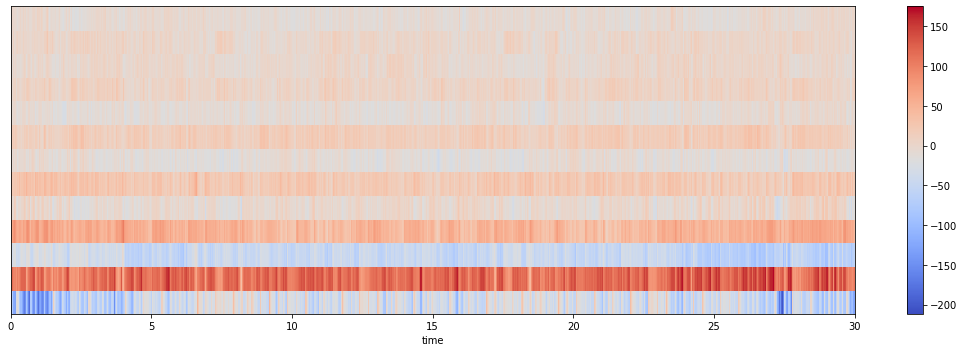

In [ ]:
plt.figure(figsize=(15,5))
librosa.display.specshow(mfcc_test, sr=sr_test1, x_axis='time')
plt.colorbar()
plt.tight_layout()
plt.xlabel('time')
plt.show()

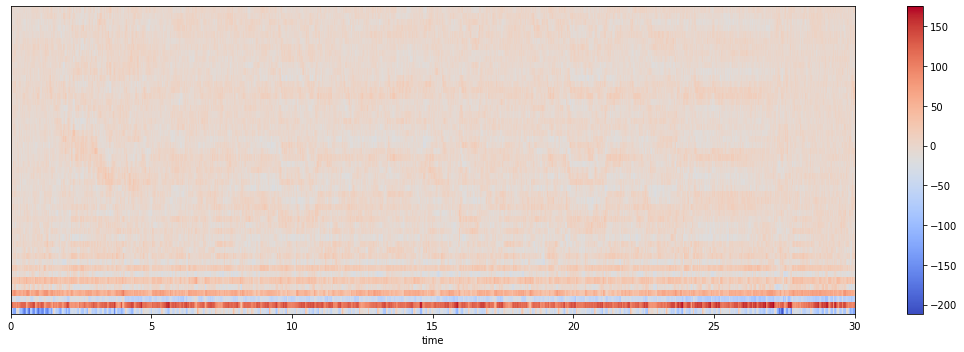

In [ ]:
mfcc_test = librosa.feature.mfcc(music_test1, sr=sr_test1, n_mfcc=50) # n_mfcc 50으로 설정

plt.figure(figsize=(15,5))
librosa.display.specshow(mfcc_test, sr=sr_test1, x_axis='time')
plt.colorbar()
plt.tight_layout()
plt.xlabel('time')
plt.show()

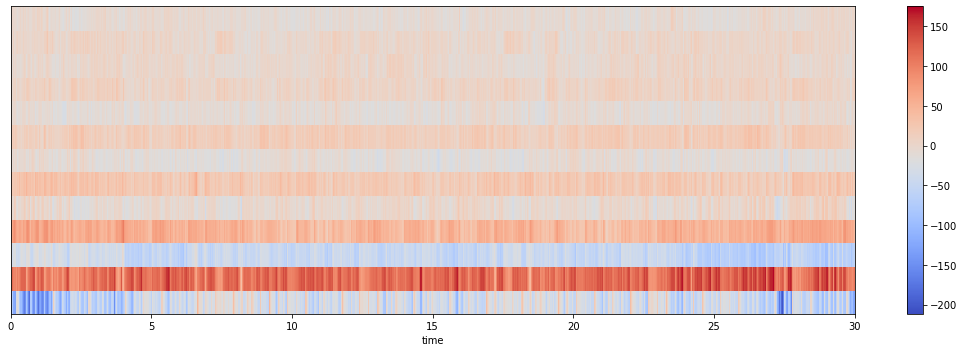

In [ ]:
mfcc_test2 = librosa.feature.mfcc(music_test1, sr=sr_test1, n_mfcc=13) # n_mfcc 13으로 설정

plt.figure(figsize=(15,5))
librosa.display.specshow(mfcc_test2, sr=sr_test1, x_axis='time')
plt.colorbar()
plt.tight_layout()
plt.xlabel('time')
plt.show()

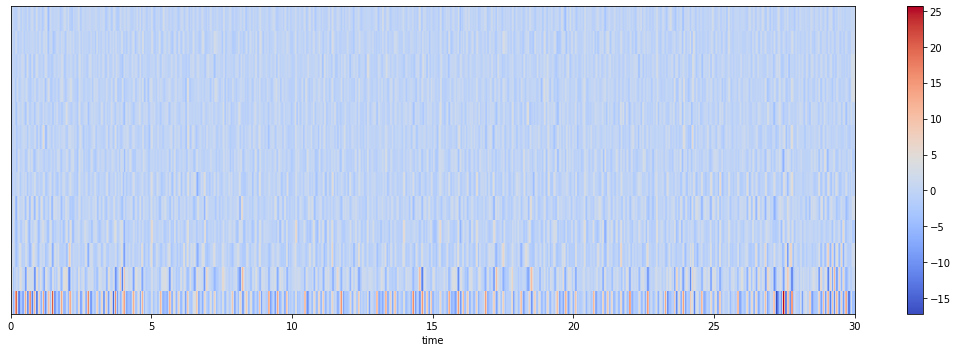

In [ ]:
mfcc_test2_delta = librosa.feature.delta(mfcc_test2)

plt.figure(figsize=(15,5))
librosa.display.specshow(mfcc_test2_delta, sr=sr_test1, x_axis='time')
plt.colorbar()
plt.tight_layout()
plt.xlabel('time')
plt.show()

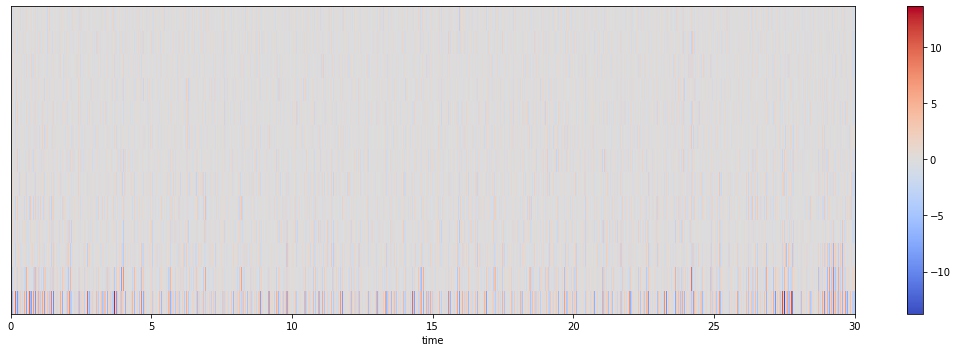

In [ ]:
mfcc_test2_delta2 = librosa.feature.delta(mfcc_test2, order=2)

plt.figure(figsize=(15,5))
librosa.display.specshow(mfcc_test2_delta2, sr=sr_test1, x_axis='time')
plt.colorbar()
plt.tight_layout()
plt.xlabel('time')
plt.show()

In [ ]:
mfcc_test2.mean(axis=1)

array([-41.303383 , 116.67117  , -47.978    ,  52.246975 ,  -2.46684  ,
        23.92176  , -10.879446 ,  16.62207  ,  -8.112418 ,   6.441608 ,
        -0.8483089,   1.2515312,  -6.8292737], dtype=float32)

In [ ]:
mfcc_test2_delta.mean(axis=1)

array([ 0.01190331,  0.01144092, -0.01259566, -0.01338301, -0.00565325,
       -0.00728546, -0.00692504, -0.00893814, -0.0031424 ,  0.00421485,
        0.00415817,  0.00010216,  0.0035779 ], dtype=float32)

In [ ]:
mfcc_test2_delta2.mean(axis=1)

array([-0.00334321,  0.00293799,  0.00169406, -0.00301089, -0.00125977,
       -0.0042638 , -0.00305993, -0.0003083 , -0.00104567, -0.00167756,
       -0.00362369, -0.00207861,  0.00113246], dtype=float32)

In [ ]:
np.concatenate((mfcc_test2.mean(axis=1), mfcc_test2_delta.mean(axis=1), mfcc_test2_delta2.mean(axis=1)))

array([-4.13033829e+01,  1.16671173e+02, -4.79780006e+01,  5.22469749e+01,
       -2.46684003e+00,  2.39217606e+01, -1.08794460e+01,  1.66220703e+01,
       -8.11241817e+00,  6.44160795e+00, -8.48308921e-01,  1.25153124e+00,
       -6.82927370e+00,  1.19033139e-02,  1.14409225e-02, -1.25956628e-02,
       -1.33830104e-02, -5.65324770e-03, -7.28546362e-03, -6.92503667e-03,
       -8.93814489e-03, -3.14239925e-03,  4.21485305e-03,  4.15816763e-03,
        1.02156453e-04,  3.57789639e-03, -3.34320869e-03,  2.93799164e-03,
        1.69406214e-03, -3.01088672e-03, -1.25977246e-03, -4.26380243e-03,
       -3.05992644e-03, -3.08296178e-04, -1.04566640e-03, -1.67756260e-03,
       -3.62369302e-03, -2.07860628e-03,  1.13246136e-03], dtype=float32)

## MFCC 특성 추출

### (1차) MFCC 13차원에 대해 각각 평균 및 분산 산출 => 총 26개 Feature 반영

In [ ]:
# 음원 특성 추출 함수 정의(v2) => v1에서 mfcc 컬럼을 추가 반영
def get_features_v2(df, duration=None, offset=0.0, start_idx=START_INDEX, end_idx=END_INDEX):
  df_copy = df.copy() # 데이터프레임 복사본 생성

  for idx, row in tqdm(df_copy.iterrows()):
    # index 범위 확인
    if idx < start_idx or idx > end_idx:
      continue

    # 음원 load
    music_path = row['Path']
    music, sr = librosa.load(music_path, sr=SAMPLING_RATE, duration=duration, offset=offset) # 옵션값 기준 구간 설정

    # mfcc 13개 차원별 평균 및 분산 산출 후 저장
    mfcc = librosa.feature.mfcc(music, sr=sr, n_mfcc=13) # n_mfcc 13으로 설정
    for i, values in enumerate(mfcc):
      df_copy.loc[idx, f'MFCC{i+1}_mean'] = values.mean() # 평균
      df_copy.loc[idx, f'MFCC{i+1}_var'] = values.var() # 분산
  
  return df_copy

#### 음원 특성 추출 결과 저장 => "df_total_v2"

In [ ]:
df_total_v2 = get_features_v2(df_total_v1)

0it [00:00, ?it/s]

In [ ]:
df_total_v2.head()

,Music,Path,Tempo,Chroma_stft1_mean,Chroma_stft1_var,Chroma_stft2_mean,Chroma_stft2_var,Chroma_stft3_mean,Chroma_stft3_var,Chroma_stft4_mean,Chroma_stft4_var,Chroma_stft5_mean,Chroma_stft5_var,Chroma_stft6_mean,Chroma_stft6_var,Chroma_stft7_mean,Chroma_stft7_var,Chroma_stft8_mean,Chroma_stft8_var,Chroma_stft9_mean,Chroma_stft9_var,Chroma_stft10_mean,Chroma_stft10_var,Chroma_stft11_mean,Chroma_stft11_var,Chroma_stft12_mean,Chroma_stft12_var,Chroma_cqt1_mean,Chroma_cqt1_var,Chroma_cqt2_mean,Chroma_cqt2_var,Chroma_cqt3_mean,Chroma_cqt3_var,Chroma_cqt4_mean,Chroma_cqt4_var,Chroma_cqt5_mean,Chroma_cqt5_var,Chroma_cqt6_mean,Chroma_cqt6_var,Chroma_cqt7_mean,...,Chroma_cens6_mean,Chroma_cens6_var,Chroma_cens7_mean,Chroma_cens7_var,Chroma_cens8_mean,Chroma_cens8_var,Chroma_cens9_mean,Chroma_cens9_var,Chroma_cens10_mean,Chroma_cens10_var,Chroma_cens11_mean,Chroma_cens11_var,Chroma_cens12_mean,Chroma_cens12_var,MFCC1_mean,MFCC1_var,MFCC2_mean,MFCC2_var,MFCC3_mean,MFCC3_var,MFCC4_mean,MFCC4_var,MFCC5_mean,MFCC5_var,MFCC6_mean,MFCC6_var,MFCC7_mean,MFCC7_var,MFCC8_mean,MFCC8_var,MFCC9_mean,MFCC9_var,MFCC10_mean,MFCC10_var,MFCC11_mean,MFCC11_var,MFCC12_mean,MFCC12_var,MFCC13_mean,MFCC13_var
0,더더 - It’s you,/content/drive/MyDrive/ds_study/DL_project2/te...,93.963068,0.455629,0.091857,0.421035,0.069740,0.501934,0.095546,0.471786,0.095901,0.422948,0.077418,0.519904,0.103906,0.424737,0.072491,0.397458,0.079420,0.396315,0.075201,0.480287,0.078926,0.610189,0.101571,0.466969,0.066534,0.515204,0.076764,0.401413,0.048684,0.582404,0.081058,0.554251,0.088089,0.380095,0.043671,0.553827,0.073857,0.381136,...,0.312777,0.018942,0.197135,0.006399,0.271000,0.017986,0.210762,0.018934,0.254793,0.009485,0.330936,0.018623,0.189543,0.007481,-77.246422,5983.342773,112.695198,732.174988,-38.904037,439.681793,53.163002,363.205170,-3.157686,156.870117,24.070549,127.785011,-10.446261,104.507866,15.341716,85.996498,-7.209357,88.866127,5.400078,79.340561,-1.824322,60.218998,0.912950,71.450890,-5.968468,50.229191
1,MC몽 - 너에게 쓰는 편지,/content/drive/MyDrive/ds_study/DL_project2/te...,95.703125,0.385404,0.101627,0.345018,0.084830,0.338347,0.083915,0.373243,0.105011,0.357092,0.093823,0.320674,0.084240,0.305181,0.071329,0.380741,0.087481,0.513290,0.117372,0.490511,0.097662,0.467087,0.107167,0.419564,0.096385,0.561075,0.121495,0.531338,0.120026,0.430538,0.078338,0.473896,0.086555,0.339087,0.047981,0.350441,0.057806,0.322761,...,0.176275,0.020943,0.152241,0.014309,0.225735,0.018216,0.297125,0.028672,0.198238,0.030400,0.277522,0.019231,0.260278,0.022349,-125.237442,8046.360840,110.237984,1391.248535,10.074493,470.187622,31.458399,400.905182,-0.131919,307.428711,27.062531,203.955215,-12.667672,161.341553,10.756165,130.535110,-2.834222,101.497513,4.420611,99.670403,-3.370812,88.781662,0.520188,96.282341,-11.863192,92.051361
2,와이낫 - 파랑새,/content/drive/MyDrive/ds_study/DL_project2/te...,101.332721,0.441707,0.092486,0.390669,0.076517,0.425990,0.094821,0.368770,0.069010,0.442873,0.099359,0.464066,0.102929,0.367889,0.062986,0.408600,0.099326,0.418237,0.080408,0.490182,0.110623,0.444174,0.096447,0.423160,0.077809,0.521200,0.100951,0.382445,0.053640,0.444765,0.069669,0.329762,0.036970,0.432361,0.054077,0.463744,0.048479,0.386621,...,0.271746,0.016500,0.192515,0.007026,0.293663,0.019678,0.280706,0.014708,0.342485,0.021357,0.307566,0.038814,0.194643,0.009192,-82.006393,6537.869629,115.500488,1254.196411,-24.530737,696.091980,48.868473,374.986664,-10.213676,343.135223,25.576668,257.841797,-4.791154,177.612274,13.465574,136.526382,-10.148331,104.626228,6.043805,96.197121,-0.521054,105.600151,2.727769,92.033218,-1.848429,80.842270
3,씨엔블루 - 외톨이야,/content/drive/MyDrive/ds_study/DL_project2/te...,105.468750,0.381196,0.096303,0.393144,0.091682,0.429483,0.105532,0.404150,0.094561,0.373291,0.086187,0.402523,0.094053,0.374840,0.074241,0.402259,0.101647,0.421317,0.090438,0.480019,0.113287,0.442668,0.106981,0.387265,0.093042,0.529438,0.065211,0.635517,0.068684,0.622463,0.074319,0.473457,0.049322,0.45660

In [ ]:
df_total_v2.shape

(514, 101)

In [ ]:
df_total_v2.to_csv(DIR_PATH + f'test_data/df_total_v2_{SAMPLE_MUSIC}.csv', index=False) # csv 파일로 저장

In [322]:
df_total_v2 = pd.read_csv(DIR_PATH + f'test_data/df_total_v2_{SAMPLE_MUSIC}.csv') # csv 파일 불러오기
df_total_v2.shape

(514, 101)

In [323]:
df_total_v2.head(20) # 특성 추출 결과 확인

,Music,Path,Tempo,Chroma_stft1_mean,Chroma_stft1_var,Chroma_stft2_mean,Chroma_stft2_var,Chroma_stft3_mean,Chroma_stft3_var,Chroma_stft4_mean,Chroma_stft4_var,Chroma_stft5_mean,Chroma_stft5_var,Chroma_stft6_mean,Chroma_stft6_var,Chroma_stft7_mean,Chroma_stft7_var,Chroma_stft8_mean,Chroma_stft8_var,Chroma_stft9_mean,Chroma_stft9_var,Chroma_stft10_mean,Chroma_stft10_var,Chroma_stft11_mean,Chroma_stft11_var,Chroma_stft12_mean,Chroma_stft12_var,Chroma_cqt1_mean,Chroma_cqt1_var,Chroma_cqt2_mean,Chroma_cqt2_var,Chroma_cqt3_mean,Chroma_cqt3_var,Chroma_cqt4_mean,Chroma_cqt4_var,Chroma_cqt5_mean,Chroma_cqt5_var,Chroma_cqt6_mean,Chroma_cqt6_var,Chroma_cqt7_mean,...,Chroma_cens6_mean,Chroma_cens6_var,Chroma_cens7_mean,Chroma_cens7_var,Chroma_cens8_mean,Chroma_cens8_var,Chroma_cens9_mean,Chroma_cens9_var,Chroma_cens10_mean,Chroma_cens10_var,Chroma_cens11_mean,Chroma_cens11_var,Chroma_cens12_mean,Chroma_cens12_var,MFCC1_mean,MFCC1_var,MFCC2_mean,MFCC2_var,MFCC3_mean,MFCC3_var,MFCC4_mean,MFCC4_var,MFCC5_mean,MFCC5_var,MFCC6_mean,MFCC6_var,MFCC7_mean,MFCC7_var,MFCC8_mean,MFCC8_var,MFCC9_mean,MFCC9_var,MFCC10_mean,MFCC10_var,MFCC11_mean,MFCC11_var,MFCC12_mean,MFCC12_var,MFCC13_mean,MFCC13_var
0,더더 - It’s you,/content/drive/MyDrive/ds_study/DL_project2/te...,93.963068,0.455629,0.091857,0.421035,0.069740,0.501934,0.095546,0.471786,0.095901,0.422948,0.077418,0.519904,0.103906,0.424737,0.072491,0.397458,0.079420,0.396315,0.075201,0.480287,0.078926,0.610189,0.101571,0.466969,0.066534,0.515204,0.076764,0.401413,0.048684,0.582404,0.081058,0.554251,0.088089,0.380095,0.043671,0.553827,0.073857,0.381136,...,0.312777,0.018942,0.197135,0.006399,0.271000,0.017986,0.210762,0.018934,0.254793,0.009485,0.330936,0.018623,0.189543,0.007481,-77.246422,5983.342773,112.695198,732.174988,-38.904037,439.681793,53.163002,363.205170,-3.157686,156.870117,24.070549,127.785011,-10.446261,104.507866,15.341716,85.996498,-7.209357,88.866127,5.400078,79.340561,-1.824322,60.218998,0.912950,71.450890,-5.968468,50.229191
1,MC몽 - 너에게 쓰는 편지,/content/drive/MyDrive/ds_study/DL_project2/te...,95.703125,0.385404,0.101627,0.345018,0.084830,0.338347,0.083915,0.373243,0.105011,0.357092,0.093823,0.320674,0.084240,0.305181,0.071329,0.380741,0.087481,0.513290,0.117372,0.490511,0.097662,0.467087,0.107167,0.419564,0.096385,0.561075,0.121495,0.531338,0.120026,0.430538,0.078338,0.473896,0.086555,0.339087,0.047981,0.350441,0.057806,0.322761,...,0.176275,0.020943,0.152241,0.014309,0.225735,0.018216,0.297125,0.028672,0.198238,0.030400,0.277522,0.019231,0.260278,0.022349,-125.237442,8046.360840,110.237984,1391.248535,10.074493,470.187622,31.458399,400.905182,-0.131919,307.428711,27.062531,203.955215,-12.667672,161.341553,10.756165,130.535110,-2.834222,101.497513,4.420611,99.670403,-3.370812,88.781662,0.520188,96.282341,-11.863192,92.051361
2,와이낫 - 파랑새,/content/drive/MyDrive/ds_study/DL_project2/te...,101.332721,0.441707,0.092486,0.390669,0.076517,0.425990,0.094821,0.368770,0.069010,0.442873,0.099359,0.464066,0.102929,0.367889,0.062986,0.408600,0.099326,0.418237,0.080408,0.490182,0.110623,0.444174,0.096447,0.423160,0.077809,0.521200,0.100951,0.382445,0.053640,0.444765,0.069669,0.329762,0.036970,0.432361,0.054077,0.463744,0.048479,0.386621,...,0.271746,0.016500,0.192515,0.007026,0.293663,0.019678,0.280706,0.014708,0.342485,0.021357,0.307566,0.038814,0.194643,0.009192,-82.006393,6537.869629,115.500488,1254.196411,-24.530737,696.091980,48.868473,374.986664,-10.213676,343.135223,25.576668,257.841797,-4.791154,177.612274,13.465574,136.526382,-10.148331,104.626228,6.043805,96.197121,-0.521054,105.600151,2.727769,92.033218,-1.848429,80.842270
3,씨엔블루 - 외톨이야,/content/drive/MyDrive/ds_study/DL_project2/te...,105.468750,0.381196,0.096303,0.393144,0.091682,0.429483,0.105532,0.404150,0.094561,0.373291,0.086187,0.402523,0.094053,0.374840,0.074241,0.402259,0.101647,0.421317,0.090438,0.480019,0.113287,0.442668,0.106981,0.387265,0.093042,0.529438,0.065211,0.635517,0.068684,0.622463,0.074319,0.473457,0.049322,0.45660

#### 전체 컬럼 스케일링 => "df_total_v2_norm"

In [324]:
df_total_v2_norm = get_norm(df_total_v2, 'ss', start_col='Tempo')
df_total_v2_norm.head()

,Music,Path,Tempo,Chroma_stft1_mean,Chroma_stft1_var,Chroma_stft2_mean,Chroma_stft2_var,Chroma_stft3_mean,Chroma_stft3_var,Chroma_stft4_mean,Chroma_stft4_var,Chroma_stft5_mean,Chroma_stft5_var,Chroma_stft6_mean,Chroma_stft6_var,Chroma_stft7_mean,Chroma_stft7_var,Chroma_stft8_mean,Chroma_stft8_var,Chroma_stft9_mean,Chroma_stft9_var,Chroma_stft10_mean,Chroma_stft10_var,Chroma_stft11_mean,Chroma_stft11_var,Chroma_stft12_mean,Chroma_stft12_var,Chroma_cqt1_mean,Chroma_cqt1_var,Chroma_cqt2_mean,Chroma_cqt2_var,Chroma_cqt3_mean,Chroma_cqt3_var,Chroma_cqt4_mean,Chroma_cqt4_var,Chroma_cqt5_mean,Chroma_cqt5_var,Chroma_cqt6_mean,Chroma_cqt6_var,Chroma_cqt7_mean,...,Chroma_cens6_mean,Chroma_cens6_var,Chroma_cens7_mean,Chroma_cens7_var,Chroma_cens8_mean,Chroma_cens8_var,Chroma_cens9_mean,Chroma_cens9_var,Chroma_cens10_mean,Chroma_cens10_var,Chroma_cens11_mean,Chroma_cens11_var,Chroma_cens12_mean,Chroma_cens12_var,MFCC1_mean,MFCC1_var,MFCC2_mean,MFCC2_var,MFCC3_mean,MFCC3_var,MFCC4_mean,MFCC4_var,MFCC5_mean,MFCC5_var,MFCC6_mean,MFCC6_var,MFCC7_mean,MFCC7_var,MFCC8_mean,MFCC8_var,MFCC9_mean,MFCC9_var,MFCC10_mean,MFCC10_var,MFCC11_mean,MFCC11_var,MFCC12_mean,MFCC12_var,MFCC13_mean,MFCC13_var
0,더더 - It’s you,/content/drive/MyDrive/ds_study/DL_project2/te...,-1.190191,-0.545853,0.082530,-0.635227,-0.252936,-0.109665,0.482027,-0.324139,0.794185,-0.821239,-0.405614,0.110159,0.703635,-0.457056,0.014023,-0.894842,0.051307,-0.797827,0.135496,-0.173366,-0.125651,1.047904,1.320460,-0.316873,-0.552658,0.613591,0.037598,0.235069,-0.288019,1.102265,0.268457,1.343021,0.991804,-0.263991,-0.748596,1.001893,0.121039,-0.087411,...,0.846089,-0.309076,-0.302626,-0.948058,0.078063,-0.478879,-0.000991,-0.033618,0.161449,-0.939699,1.485885,-0.111082,-0.234087,-0.956463,2.514783,-1.055155,-1.093971,-1.652418,-1.916409,-1.308662,1.247686,-1.018433,-0.705326,-1.369195,0.975976,-0.964108,-1.586079,-0.853648,1.453452,-0.820606,-1.234287,-0.552000,0.555869,-0.583847,-0.353365,-0.793391,0.015127,-0.447227,-1.182270,-0.780689
1,MC몽 - 너에게 쓰는 편지,/content/drive/MyDrive/ds_study/DL_project2/te...,-1.116211,-1.089378,0.489764,-1.250611,0.417578,-1.492630,-0.017524,-1.182348,1.212017,-1.350539,0.282957,-1.484320,-0.100082,-1.537669,-0.039306,-1.048583,0.390414,0.282349,2.077205,-0.083872,0.705013,-0.214617,1.572272,-0.729489,0.862527,0.936348,1.306524,1.210692,2.191432,0.045137,0.184486,0.746677,0.941285,-0.544607,-0.610315,-0.398728,-0.330119,-0.517099,...,-0.574921,-0.210841,-0.835247,-0.406501,-0.395825,-0.465432,1.036034,0.610927,-0.446997,0.266027,0.895652,-0.077144,0.597501,-0.068662,1.769922,-0.587434,-1.189481,-1.049567,-0.139036,-1.261104,-0.093437,-0.936775,-0.464484,-0.533317,1.307536,-0.474649,-1.851821,-0.208620,0.823274,-0.279869,-0.514352,-0.354360,0.392347,-0.268012,-0.632273,-0.221221,-0.058830,0.071554,-2.371592,0.195376
2,와이낫 - 파랑새,/content/drive/MyDrive/ds_study/DL_project2/te...,-0.876866,-0.653607,0.108749,-0.881053,0.048207,-0.751697,0.450900,-1.221297,-0.439152,-0.661098,0.515297,-0.336726,0.663683,-0.970881,-0.422306,-0.792368,0.888719,-0.595392,0.375240,-0.086752,1.279661,-0.416760,1.089873,-0.698190,-0.018122,0.655776,0.723737,0.092642,-0.115756,0.144175,-0.083200,-0.322988,-0.690887,0.093665,-0.414783,0.381534,-0.592314,-0.047037,...,0.418948,-0.429021,-0.357441,-0.905125,0.315330,-0.379937,0.838883,-0.313273,1.104899,-0.255293,1.227644,1.014521,-0.174131,-0.854338,2.440904,-0.929434,-0.984932,-1.174928,-1.394819,-0.908918,0.982328,-0.992914,-1.266961,-0.335081,1.142878,-0.128382,-0.909573,-0.023958,1.195620,-0.207129,-1.717899,-0.305405,0.663339,-0.321971,-0.118323,0.115688,0.356859,-0.017219,-0.351010,-0.066227
3,씨엔블루 - 외톨이야,/content/drive/MyDrive/ds_study/DL_project2/te...,-0.701021,-1.121944,0.267865,-0.861013,0.722036,-0.722165,0.910910,-0.913179,0.732724,-1.220337,-0.037543,-0.829265,0.300959,-0.908058,0.094375,-0.850683,0.986353,-0.566954,0.837059,-0.175713,1.397769,-0.430050,1.563883,-1.010613,0.704056,0.713740,-0.290123,1.992987,0.407065,1.3

## 음원별 유사도 측정 및 비교(v2)

#### 원곡음원과 유사음원간 비교 => "score_table_2a"

In [ ]:
# 원곡음원과 유사음원간 비교 결과 => "score_table_2a"
score_table_2a = get_similarity_A(df_total_v2_norm, start_col='Tempo')
score_table_2a

,원곡,비교곡,구분,Euclidean,Cos_sim,Pearson_sim
1,더더 - It’s you,MC몽 - 너에게 쓰는 편지,표절,7.975023,0.540339,0.540897
2,와이낫 - 파랑새,씨엔블루 - 외톨이야,표절의혹,5.983680,0.740465,0.739906
3,요시마타 료 - Resolver,FTISLAND - 사랑앓이,표절의혹,6.469203,0.558512,0.558441
4,TLC - No Scrubs,Ed Sheeran - Shape of you,샘플링,10.377444,0.286611,0.297194
5,Harold Faltermeyer - Axel F,싸이 - 챔피언,샘플링,6.962363,0.648783,0.650248
6,A$ton Wyld - Next Level,에스파 - Next Level,리메이크,7.474255,0.461803,0.458567
7,S.E.S. - Dreams Come True,에스파 - Dreams Come True,리메이크,4.235604,0.876849,0.876603


#### 원곡음원과 샘플음원(랜덤추출)간 비교 => "score_table_2b"

In [ ]:
# 원곡음원과 샘플음원(랜덤추출)간 비교 결과 => "score_table_2b"
score_table_2b = get_similarity_B(df_total_v2_norm, start_col='Tempo')
score_table_2b

,원곡,비교곡,Euclidean,Cos_sim,Pearson_sim
1,더더 - It’s you,샘플 Music 500곡,12.691976,0.004436,0.005785
2,와이낫 - 파랑새,샘플 Music 500곡,12.269280,-0.000209,0.000263
3,요시마타 료 - Resolver,샘플 Music 500곡,11.744420,0.002177,0.004687
4,TLC - No Scrubs,샘플 Music 500곡,13.057510,0.000714,-0.000231
5,Harold Faltermeyer - Axel F,샘플 Music 500곡,12.681067,0.000623,-0.000986
6,A$ton Wyld - Next Level,샘플 Music 500곡,12.313355,-0.000295,-0.001185
7,S.E.S. - Dreams Come True,샘플 Music 500곡,13.122772,0.005378,0.006121


In [ ]:
# Score 산출 결과 확인
score_table_result_2ab = get_score_result(score_table_2a, score_table_2b, rate=False) # 2a 기준으로 2b와 비교
score_table_result_2ab

,원곡,비교곡,구분,Euclidean,Cos_sim,Pearson_sim,Score
1,더더 - It’s you,MC몽 - 너에게 쓰는 편지,표절,4.716954,0.535903,0.535112,192.93
2,와이낫 - 파랑새,씨엔블루 - 외톨이야,표절의혹,6.285600,0.740673,0.739643,258.86
3,요시마타 료 - Resolver,FTISLAND - 사랑앓이,표절의혹,5.275216,0.556335,0.553754,212.84
4,TLC - No Scrubs,Ed Sheeran - Shape of you,샘플링,2.680066,0.285897,0.297425,108.78
5,Harold Faltermeyer - Axel F,싸이 - 챔피언,샘플링,5.718704,0.648160,0.651234,233.94
6,A$ton Wyld - Next Level,에스파 - Next Level,리메이크,4.839099,0.462098,0.459752,192.03
7,S.E.S. - Dreams Come True,에스파 - Dreams Come True,리메이크,8.887168,0.871471,0.870482,354.30


In [ ]:
score_table_result_2ab_mean = score_table_result_2ab["Score"].mean() # Score 평균 확인
score_table_result_2ab_mean

221.9542857142857

#### Test음원과 Test음원(12곡)간 비교 => "score_table_2c"

In [ ]:
# 원곡음원과 Test음원(12곡)간 비교 결과
score_table_2c = get_similarity_C(df_total_v2_norm, start_col='Tempo')
score_table_2c

,원곡,비교곡,Euclidean,Cos_sim,Pearson_sim
1,더더 - It’s you,다른 Test음원 12곡,7.863316,0.506887,0.511656
2,와이낫 - 파랑새,다른 Test음원 12곡,7.564321,0.498360,0.500461
3,요시마타 료 - Resolver,다른 Test음원 12곡,8.781699,0.292652,0.298856
4,TLC - No Scrubs,다른 Test음원 12곡,8.753873,0.431337,0.436610
5,Harold Faltermeyer - Axel F,다른 Test음원 12곡,9.859649,0.234820,0.247942
6,A$ton Wyld - Next Level,다른 Test음원 12곡,9.236501,0.294414,0.302069
7,S.E.S. - Dreams Come True,다른 Test음원 12곡,8.263381,0.497288,0.499331


In [ ]:
# Score 산출 결과 확인
score_table_result_2ac = get_score_result(score_table_2a, score_table_2c, rate=False) # 2a 기준으로 2c와 비교
score_table_result_2ac

,원곡,비교곡,구분,Euclidean,Cos_sim,Pearson_sim,Score
1,더더 - It’s you,MC몽 - 너에게 쓰는 편지,표절,-0.111706,0.033452,0.029241,-1.63
2,와이낫 - 파랑새,씨엔블루 - 외톨이야,표절의혹,1.580642,0.242104,0.239445,68.74
3,요시마타 료 - Resolver,FTISLAND - 사랑앓이,표절의혹,2.312496,0.265860,0.259586,94.60
4,TLC - No Scrubs,Ed Sheeran - Shape of you,샘플링,-1.623571,-0.144726,-0.139416,-63.59
5,Harold Faltermeyer - Axel F,싸이 - 챔피언,샘플링,2.897286,0.413963,0.402306,123.79
6,A$ton Wyld - Next Level,에스파 - Next Level,리메이크,1.762246,0.167389,0.156498,69.54
7,S.E.S. - Dreams Come True,에스파 - Dreams Come True,리메이크,4.027777,0.379561,0.377272,159.49


In [ ]:
score_table_result_2ac_mean = score_table_result_2ac["Score"].mean() # Score 평균 확인
score_table_result_2ac_mean

64.42

### (2차) MFCC 13차원에 대해 mfcc, mfcc_delta, mfcc_delta2를 구한 뒤, 각각의 평균 산출 => 총 39개 Feature 반영

In [ ]:
# 음원 특성 추출 함수 정의(v2_1) => v1에서 mfcc 컬럼을 추가 반영
def get_features_v2_1(df, duration=None, offset=0.0, start_idx=START_INDEX, end_idx=END_INDEX):
  df_copy = df.copy() # 데이터프레임 복사본 생성

  for idx, row in tqdm(df_copy.iterrows()):
    # index 범위 확인
    if idx < start_idx or idx > end_idx:
      continue

    # 음원 load
    music_path = row['Path']
    music, sr = librosa.load(music_path, sr=SAMPLING_RATE, duration=duration, offset=offset) # 옵션값 기준 구간 설정

    # mfcc 13개 차원별 평균 산출 후 저장
    mfcc = librosa.feature.mfcc(music, sr=sr, n_mfcc=13) # n_mfcc 13으로 설정
    for i, values in enumerate(mfcc):
      df_copy.loc[idx, f'MFCC{i+1}_mean'] = values.mean()
    
    # mfcc_delta 13개 차원별 평균 산출 후 저장
    mfcc_delta = librosa.feature.delta(mfcc, order=1) # delta(1차 차분)
    for i, values in enumerate(mfcc_delta):
      df_copy.loc[idx, f'MFCC_DELTA{i+1}_mean'] = values.mean()

    # mfcc_delta2 13개 차원별 평균 산출 후 저장
    mfcc_delta_delta = librosa.feature.delta(mfcc, order=2) # delta-delta(2차 차분)
    for i, values in enumerate(mfcc_delta_delta):
      df_copy.loc[idx, f'MFCC_DELTA_DELTA{i+1}_mean'] = values.mean()

  return df_copy

#### 음원 특성 추출 결과 저장 => "df_total_v2_1"

In [ ]:
df_total_v2_1 = get_features_v2_1(df_total_v1)

0it [00:00, ?it/s]

In [ ]:
df_total_v2_1.to_csv(DIR_PATH + f'test_data/df_total_v2_1_{SAMPLE_MUSIC}.csv', index=False) # csv 파일로 저장

In [337]:
df_total_v2_1 = pd.read_csv(DIR_PATH + f'test_data/df_total_v2_1_{SAMPLE_MUSIC}.csv') # csv 파일 불러오기
df_total_v2_1.shape

(514, 114)

In [338]:
df_total_v2_1.head(20) # 특성 추출 결과 확인

,Music,Path,Tempo,Chroma_stft1_mean,Chroma_stft1_var,Chroma_stft2_mean,Chroma_stft2_var,Chroma_stft3_mean,Chroma_stft3_var,Chroma_stft4_mean,Chroma_stft4_var,Chroma_stft5_mean,Chroma_stft5_var,Chroma_stft6_mean,Chroma_stft6_var,Chroma_stft7_mean,Chroma_stft7_var,Chroma_stft8_mean,Chroma_stft8_var,Chroma_stft9_mean,Chroma_stft9_var,Chroma_stft10_mean,Chroma_stft10_var,Chroma_stft11_mean,Chroma_stft11_var,Chroma_stft12_mean,Chroma_stft12_var,Chroma_cqt1_mean,Chroma_cqt1_var,Chroma_cqt2_mean,Chroma_cqt2_var,Chroma_cqt3_mean,Chroma_cqt3_var,Chroma_cqt4_mean,Chroma_cqt4_var,Chroma_cqt5_mean,Chroma_cqt5_var,Chroma_cqt6_mean,Chroma_cqt6_var,Chroma_cqt7_mean,...,Chroma_cens12_var,MFCC1_mean,MFCC2_mean,MFCC3_mean,MFCC4_mean,MFCC5_mean,MFCC6_mean,MFCC7_mean,MFCC8_mean,MFCC9_mean,MFCC10_mean,MFCC11_mean,MFCC12_mean,MFCC13_mean,MFCC_DELTA1_mean,MFCC_DELTA2_mean,MFCC_DELTA3_mean,MFCC_DELTA4_mean,MFCC_DELTA5_mean,MFCC_DELTA6_mean,MFCC_DELTA7_mean,MFCC_DELTA8_mean,MFCC_DELTA9_mean,MFCC_DELTA10_mean,MFCC_DELTA11_mean,MFCC_DELTA12_mean,MFCC_DELTA13_mean,MFCC_DELTA_DELTA1_mean,MFCC_DELTA_DELTA2_mean,MFCC_DELTA_DELTA3_mean,MFCC_DELTA_DELTA4_mean,MFCC_DELTA_DELTA5_mean,MFCC_DELTA_DELTA6_mean,MFCC_DELTA_DELTA7_mean,MFCC_DELTA_DELTA8_mean,MFCC_DELTA_DELTA9_mean,MFCC_DELTA_DELTA10_mean,MFCC_DELTA_DELTA11_mean,MFCC_DELTA_DELTA12_mean,MFCC_DELTA_DELTA13_mean
0,더더 - It’s you,/content/drive/MyDrive/ds_study/DL_project2/te...,93.963068,0.455629,0.091857,0.421035,0.069740,0.501934,0.095546,0.471786,0.095901,0.422948,0.077418,0.519904,0.103906,0.424737,0.072491,0.397458,0.079420,0.396315,0.075201,0.480287,0.078926,0.610189,0.101571,0.466969,0.066534,0.515204,0.076764,0.401413,0.048684,0.582404,0.081058,0.554251,0.088089,0.380095,0.043671,0.553827,0.073857,0.381136,...,0.007481,-77.246422,112.695198,-38.904037,53.163002,-3.157686,24.070549,-10.446261,15.341716,-7.209357,5.400078,-1.824322,0.912950,-5.968468,2.999373e-03,2.905954e-03,3.658947e-04,-1.015852e-03,-8.616315e-04,-3.824449e-04,-2.447106e-04,-1.967493e-04,-6.493377e-05,3.081886e-05,6.791847e-05,8.557516e-05,6.655029e-05,-2.905248e-04,-5.531903e-04,-6.781313e-04,-4.055606e-04,5.637367e-05,2.216778e-04,2.119022e-05,-2.273773e-04,-2.989613e-04,-1.806716e-04,3.645500e-05,1.753905e-04,1.355068e-04
1,MC몽 - 너에게 쓰는 편지,/content/drive/MyDrive/ds_study/DL_project2/te...,95.703125,0.385404,0.101627,0.345018,0.084830,0.338347,0.083915,0.373243,0.105011,0.357092,0.093823,0.320674,0.084240,0.305181,0.071329,0.380741,0.087481,0.513290,0.117372,0.490511,0.097662,0.467087,0.107167,0.419564,0.096385,0.561075,0.121495,0.531338,0.120026,0.430538,0.078338,0.473896,0.086555,0.339087,0.047981,0.350441,0.057806,0.322761,...,0.022349,-125.237442,110.237984,10.074493,31.458399,-0.131919,27.062531,-12.667672,10.756165,-2.834222,4.420611,-3.370812,0.520188,-11.863192,-3.402183e-09,-2.551637e-09,3.189546e-10,-1.063182e-09,0.000000e+00,1.063182e-10,0.000000e+00,-4.252728e-10,-1.328978e-09,3.455342e-10,-1.063182e-09,0.000000e+00,6.379092e-10,-3.189546e-09,-1.382137e-09,-8.771252e-10,1.674512e-09,7.973865e-11,-6.246195e-10,6.113297e-10,5.714604e-10,3.986933e-10,1.249239e-09,-5.315910e-10,5.980399e-11,-6.644888e-11
2,와이낫 - 파랑새,/content/drive/MyDrive/ds_study/DL_project2/te...,101.332721,0.441707,0.092486,0.390669,0.076517,0.425990,0.094821,0.368770,0.069010,0.442873,0.099359,0.464066,0.102929,0.367889,0.062986,0.408600,0.099326,0.418237,0.080408,0.490182,0.110623,0.444174,0.096447,0.423160,0.077809,0.521200,0.100951,0.382445,0.053640,0.444765,0.069669,0.329762,0.036970,0.432361,0.054077,0.463744,0.048479,0.386621,...,0.009192,-82.006393,115.500488,-24.530737,48.868473,-10.213676,25.576668,-4.791154,13.465574,-10.148331,6.043805,-0.521054,2.727769,-1.848429,-1.411477e-05,-1.993803e-05,-1.985902e-05,-1.973343e-05,-1.955669e-05,-1.932989e-05,-1.905455e-05,-1.873143e-05,-1.836044e-05,-1.794574e-05,-1.748501e-05,-1.698099e-05,-1.643486e-05,-8.846273e-06,-1.249941e-05,-1.246619e-05,-1.241730e-05,-1.234753e-05,-1.225863e-05,-1.215063e-05,

#### 전체 컬럼 스케일링 => "df_total_v2_1_norm"

In [339]:
df_total_v2_1_norm = get_norm(df_total_v2_1, 'ss', start_col='Tempo')
df_total_v2_1_norm.head()

,Music,Path,Tempo,Chroma_stft1_mean,Chroma_stft1_var,Chroma_stft2_mean,Chroma_stft2_var,Chroma_stft3_mean,Chroma_stft3_var,Chroma_stft4_mean,Chroma_stft4_var,Chroma_stft5_mean,Chroma_stft5_var,Chroma_stft6_mean,Chroma_stft6_var,Chroma_stft7_mean,Chroma_stft7_var,Chroma_stft8_mean,Chroma_stft8_var,Chroma_stft9_mean,Chroma_stft9_var,Chroma_stft10_mean,Chroma_stft10_var,Chroma_stft11_mean,Chroma_stft11_var,Chroma_stft12_mean,Chroma_stft12_var,Chroma_cqt1_mean,Chroma_cqt1_var,Chroma_cqt2_mean,Chroma_cqt2_var,Chroma_cqt3_mean,Chroma_cqt3_var,Chroma_cqt4_mean,Chroma_cqt4_var,Chroma_cqt5_mean,Chroma_cqt5_var,Chroma_cqt6_mean,Chroma_cqt6_var,Chroma_cqt7_mean,...,Chroma_cens12_var,MFCC1_mean,MFCC2_mean,MFCC3_mean,MFCC4_mean,MFCC5_mean,MFCC6_mean,MFCC7_mean,MFCC8_mean,MFCC9_mean,MFCC10_mean,MFCC11_mean,MFCC12_mean,MFCC13_mean,MFCC_DELTA1_mean,MFCC_DELTA2_mean,MFCC_DELTA3_mean,MFCC_DELTA4_mean,MFCC_DELTA5_mean,MFCC_DELTA6_mean,MFCC_DELTA7_mean,MFCC_DELTA8_mean,MFCC_DELTA9_mean,MFCC_DELTA10_mean,MFCC_DELTA11_mean,MFCC_DELTA12_mean,MFCC_DELTA13_mean,MFCC_DELTA_DELTA1_mean,MFCC_DELTA_DELTA2_mean,MFCC_DELTA_DELTA3_mean,MFCC_DELTA_DELTA4_mean,MFCC_DELTA_DELTA5_mean,MFCC_DELTA_DELTA6_mean,MFCC_DELTA_DELTA7_mean,MFCC_DELTA_DELTA8_mean,MFCC_DELTA_DELTA9_mean,MFCC_DELTA_DELTA10_mean,MFCC_DELTA_DELTA11_mean,MFCC_DELTA_DELTA12_mean,MFCC_DELTA_DELTA13_mean
0,더더 - It’s you,/content/drive/MyDrive/ds_study/DL_project2/te...,-1.190191,-0.545853,0.082530,-0.635227,-0.252936,-0.109665,0.482027,-0.324139,0.794185,-0.821239,-0.405614,0.110159,0.703635,-0.457056,0.014023,-0.894842,0.051307,-0.797827,0.135496,-0.173366,-0.125651,1.047904,1.320460,-0.316873,-0.552658,0.613591,0.037598,0.235069,-0.288019,1.102265,0.268457,1.343021,0.991804,-0.263991,-0.748596,1.001893,0.121039,-0.087411,...,-0.956463,2.514783,-1.093971,-1.916409,1.247686,-0.705326,0.975976,-1.586079,1.453452,-1.234287,0.555869,-0.353365,0.015127,-1.182270,0.542120,0.650379,0.041351,-0.073298,-0.264754,-0.053738,-0.154011,-0.195851,-0.224133,-0.146793,-0.148163,-0.119943,-0.192287,0.445019,0.570098,0.087606,0.197789,0.113799,0.347054,0.029348,-0.040904,-0.344351,-0.301415,-0.156317,0.019657,-0.070963
1,MC몽 - 너에게 쓰는 편지,/content/drive/MyDrive/ds_study/DL_project2/te...,-1.116211,-1.089378,0.489764,-1.250611,0.417578,-1.492630,-0.017524,-1.182348,1.212017,-1.350539,0.282957,-1.484320,-0.100082,-1.537669,-0.039306,-1.048583,0.390414,0.282349,2.077205,-0.083872,0.705013,-0.214617,1.572272,-0.729489,0.862527,0.936348,1.306524,1.210692,2.191432,0.045137,0.184486,0.746677,0.941285,-0.544607,-0.610315,-0.398728,-0.330119,-0.517099,...,-0.068662,1.769922,-1.189481,-0.139036,-0.093437,-0.464484,1.307536,-1.851821,0.823274,-0.514352,0.392347,-0.632273,-0.058830,-2.371592,0.441141,0.455336,-0.006511,0.108118,-0.103136,0.081189,-0.062899,-0.108334,-0.194985,-0.163946,-0.179795,-0.157569,-0.227361,0.453771,0.610850,0.217405,0.284949,0.092563,0.257579,0.017751,0.090044,-0.159554,-0.147702,-0.184264,-0.111248,-0.190792
2,와이낫 - 파랑새,/content/drive/MyDrive/ds_study/DL_project2/te...,-0.876866,-0.653607,0.108749,-0.881053,0.048207,-0.751697,0.450900,-1.221297,-0.439152,-0.661098,0.515297,-0.336726,0.663683,-0.970881,-0.422306,-0.792368,0.888719,-0.595392,0.375240,-0.086752,1.279661,-0.416760,1.089873,-0.698190,-0.018122,0.655776,0.723737,0.092642,-0.115756,0.144175,-0.083200,-0.322988,-0.690887,0.093665,-0.414783,0.381534,-0.592314,-0.047037,...,-0.854338,2.440904,-0.984932,-1.394819,0.982328,-1.266961,1.142878,-0.909573,1.195620,-1.717899,0.663339,-0.118323,0.356859,-0.351010,0.440666,0.453998,-0.009109,0.104594,-0.106805,0.074370,-0.069993,-0.116666,-0.203226,-0.173935,-0.187938,-0.165036,-0.236023,0.453505,0.609929,0.215019,0.282280,0.087911,0.252632,0.011101,0.083118,-0.166895,-0.157668,-0.193103,-0.119703,-0.200617
3,씨엔블루 - 외톨이야,/content/drive/MyDrive/ds_study/DL_project2/te...,-0.701021,-1.121944,0.267865,-0.861013,0.722036,-0.722165,0.910910,-0.913179,0.732724,-1.220337,-0.037543,-0.829265,0.300959,-0.908058,

## 음원별 유사도 측정 및 비교(v2_1)

#### 원곡음원과 유사음원간 비교 => "score_table_2_1a"

In [ ]:
# 원곡음원과 유사음원간 비교 결과 => "score_table_2_1a"
score_table_2_1a = get_similarity_A(df_total_v2_1_norm, start_col='Tempo')
score_table_2_1a

,원곡,비교곡,구분,Euclidean,Cos_sim,Pearson_sim
1,더더 - It’s you,MC몽 - 너에게 쓰는 편지,표절,7.743746,0.519530,0.519994
2,와이낫 - 파랑새,씨엔블루 - 외톨이야,표절의혹,5.850594,0.731709,0.731637
3,요시마타 료 - Resolver,FTISLAND - 사랑앓이,표절의혹,5.759248,0.580383,0.581847
4,TLC - No Scrubs,Ed Sheeran - Shape of you,샘플링,10.462871,0.245470,0.256759
5,Harold Faltermeyer - Axel F,싸이 - 챔피언,샘플링,6.696899,0.661809,0.657167
6,A$ton Wyld - Next Level,에스파 - Next Level,리메이크,6.941959,0.504578,0.503916
7,S.E.S. - Dreams Come True,에스파 - Dreams Come True,리메이크,4.050026,0.879556,0.879486


#### 원곡음원과 샘플음원(랜덤추출)간 비교 => "score_table_2_1b"

In [ ]:
# 원곡음원과 샘플음원(랜덤추출)간 비교 결과 => "score_table_2_1b"
score_table_2_1b = get_similarity_B(df_total_v2_1_norm, start_col='Tempo')
score_table_2_1b

,원곡,비교곡,Euclidean,Cos_sim,Pearson_sim
1,더더 - It’s you,샘플 Music 500곡,12.600466,0.004713,0.004652
2,와이낫 - 파랑새,샘플 Music 500곡,12.482479,0.004403,0.003976
3,요시마타 료 - Resolver,샘플 Music 500곡,11.521195,0.002805,0.004111
4,TLC - No Scrubs,샘플 Music 500곡,13.238508,-0.000213,-0.002770
5,Harold Faltermeyer - Axel F,샘플 Music 500곡,12.854986,0.006614,0.003969
6,A$ton Wyld - Next Level,샘플 Music 500곡,12.440137,0.005924,0.005315
7,S.E.S. - Dreams Come True,샘플 Music 500곡,13.284567,0.006742,0.006540


In [ ]:
# Score 산출 결과 확인 => "score_table_result_2_1ab"
score_table_result_2_1ab = get_score_result(score_table_2_1a, score_table_2_1b, rate=False) # 2_1a 기준으로 2_1b와 비교
score_table_result_2_1ab

,원곡,비교곡,구분,Euclidean,Cos_sim,Pearson_sim,Score
1,더더 - It’s you,MC몽 - 너에게 쓰는 편지,표절,4.856720,0.514817,0.515342,196.23
2,와이낫 - 파랑새,씨엔블루 - 외톨이야,표절의혹,6.631884,0.727307,0.727661,269.56
3,요시마타 료 - Resolver,FTISLAND - 사랑앓이,표절의혹,5.761947,0.577578,0.577736,230.58
4,TLC - No Scrubs,Ed Sheeran - Shape of you,샘플링,2.775638,0.245682,0.259529,109.36
5,Harold Faltermeyer - Axel F,싸이 - 챔피언,샘플링,6.158087,0.655195,0.653198,248.88
6,A$ton Wyld - Next Level,에스파 - Next Level,리메이크,5.498178,0.498654,0.498600,216.51
7,S.E.S. - Dreams Come True,에스파 - Dreams Come True,리메이크,9.234541,0.872814,0.872946,366.01


In [ ]:
score_table_result_2_1ab_mean = score_table_result_2_1ab["Score"].mean() # Score 평균 확인
score_table_result_2_1ab_mean

233.8757142857143

#### Test음원과 Test음원(12곡)간 비교 => "score_table_2_1c"

In [ ]:
# 원곡음원과 Test음원(12곡)간 비교 결과 => "score_table_2_1c"
score_table_2_1c = get_similarity_C(df_total_v2_1_norm, start_col='Tempo')
score_table_2_1c

,원곡,비교곡,Euclidean,Cos_sim,Pearson_sim
1,더더 - It’s you,다른 Test음원 12곡,7.414603,0.503570,0.505450
2,와이낫 - 파랑새,다른 Test음원 12곡,7.298426,0.500105,0.500174
3,요시마타 료 - Resolver,다른 Test음원 12곡,8.194622,0.280236,0.285450
4,TLC - No Scrubs,다른 Test음원 12곡,8.561101,0.412380,0.412218
5,Harold Faltermeyer - Axel F,다른 Test음원 12곡,9.533189,0.227676,0.227335
6,A$ton Wyld - Next Level,다른 Test음원 12곡,8.199044,0.391528,0.391579
7,S.E.S. - Dreams Come True,다른 Test음원 12곡,8.036486,0.491844,0.492281


In [ ]:
# Score 산출 결과 확인 => "score_table_result_2_1ac"
score_table_result_2_1ac = get_score_result(score_table_2_1a, score_table_2_1c, rate=False) # 2_1a 기준으로 2_1c와 비교
score_table_result_2_1ac

,원곡,비교곡,구분,Euclidean,Cos_sim,Pearson_sim,Score
1,더더 - It’s you,MC몽 - 너에게 쓰는 편지,표절,-0.329144,0.015960,0.014544,-9.95
2,와이낫 - 파랑새,씨엔블루 - 외톨이야,표절의혹,1.447832,0.231605,0.231463,63.70
3,요시마타 료 - Resolver,FTISLAND - 사랑앓이,표절의혹,2.435375,0.300146,0.296397,101.06
4,TLC - No Scrubs,Ed Sheeran - Shape of you,샘플링,-1.901770,-0.166911,-0.155459,-74.14
5,Harold Faltermeyer - Axel F,싸이 - 챔피언,샘플링,2.836290,0.434133,0.429832,123.34
6,A$ton Wyld - Next Level,에스파 - Next Level,리메이크,1.257085,0.113050,0.112336,49.42
7,S.E.S. - Dreams Come True,에스파 - Dreams Come True,리메이크,3.986460,0.387712,0.387205,158.71


In [ ]:
score_table_result_2_1ac_mean = score_table_result_2_1ac["Score"].mean() # Score 평균 확인
score_table_result_2_1ac_mean

58.87714285714286

> Score 평균이 58.88로, 기존 Score 평균(64.42) 대비 점수가 오히려 낮아진 것으로 확인됨<br/>
=> MFCC 13차원에 대해 delta값 보다는 평균 및 분산을 산출해 적용하는 것이 더 나은 것으로 판단됨

In [ ]:
score_table_result_2ac_mean # (기존) MFCC 13차원에 대해 각각 평균 및 분산 산출 시 Score 평균

64.42

## 음원 특성 조합별 유사도 측정 결과 비교

In [370]:
# 특정 음원과 전체 음원간 유사도 측정 함수 정의
def get_similarity_ALL(file_name, df_norm, start_col='Tempo', end_col='Chroma_cens12_var', col_names=False):
  # "score_table_all" 생성
  score_table_all = pd.DataFrame(columns=['원곡', '비교곡', 'Euclidean', 'Cos_sim', 'Pearson_sim'])

  # 특정 음원 데이터 값 추출
  idx_a = list(df_norm['Music']).index(file_name)
  if col_names:
    a = df_norm[col_names].loc[idx_a, :].values
  else:
    a = df_norm.loc[idx_a, start_col:end_col].values

  for idx, row in df_norm.iterrows():
    # 비교대상 데이터 값 추출
    if col_names:
      b = df_norm[col_names].loc[idx, :].values
    else:
      b = df_norm.loc[idx, start_col:end_col].values

    new_data = {
        '원곡' : file_name,
        '비교곡' : row['Music'],
        'Euclidean' : euclidean_dist(a, b),
        'Cos_sim' : cos_similarity(a, b),
        'Pearson_sim' : pearson_similarity(a, b)
    }

    # 행 데이터 추가
    score_table_all = score_table_all.append(new_data, ignore_index=True)
  
  score_table_all['Score'] = (100.0 - score_table_all['Euclidean']) * (score_table_all['Cos_sim'] + 1.0) * (score_table_all['Pearson_sim'] + 1.0)
  
  return score_table_all

In [371]:
list(df_total_v1['Music'][:14])

['더더 - It’s you',
 'MC몽 - 너에게 쓰는 편지',
 '와이낫 - 파랑새',
 '씨엔블루 - 외톨이야',
 '요시마타 료 - Resolver',
 'FTISLAND - 사랑앓이',
 'TLC - No Scrubs',
 'Ed Sheeran - Shape of you',
 'Harold Faltermeyer - Axel F',
 '싸이 - 챔피언',
 'A$ton Wyld - Next Level',
 '에스파 - Next Level',
 'S.E.S. - Dreams Come True',
 '에스파 - Dreams Come True']

In [511]:
col_names=['Tempo',
  'Chroma_stft1_mean', 'Chroma_stft2_mean', 'Chroma_stft3_mean', 'Chroma_stft4_mean', 'Chroma_stft5_mean', 'Chroma_stft6_mean',
  'Chroma_stft7_mean', 'Chroma_stft8_mean', 'Chroma_stft9_mean', 'Chroma_stft10_mean', 'Chroma_stft11_mean', 'Chroma_stft12_mean',
  'Chroma_stft1_var', 'Chroma_stft2_var', 'Chroma_stft3_var', 'Chroma_stft4_var', 'Chroma_stft5_var', 'Chroma_stft6_var',
  'Chroma_stft7_var', 'Chroma_stft8_var', 'Chroma_stft9_var', 'Chroma_stft10_var', 'Chroma_stft11_var', 'Chroma_stft12_var',
  'Chroma_cqt1_mean', 'Chroma_cqt2_mean', 'Chroma_cqt3_mean', 'Chroma_cqt4_mean', 'Chroma_cqt5_mean', 'Chroma_cqt6_mean',
  'Chroma_cqt7_mean', 'Chroma_cqt8_mean', 'Chroma_cqt9_mean', 'Chroma_cqt10_mean', 'Chroma_cqt11_mean', 'Chroma_cqt12_mean',
  'Chroma_cqt1_var', 'Chroma_cqt2_var', 'Chroma_cqt3_var', 'Chroma_cqt4_var', 'Chroma_cqt5_var', 'Chroma_cqt6_var',
  'Chroma_cqt7_var', 'Chroma_cqt8_var', 'Chroma_cqt9_var', 'Chroma_cqt10_var', 'Chroma_cqt11_var', 'Chroma_cqt12_var',
  # 'Chroma_cens1_mean', 'Chroma_cens2_mean', 'Chroma_cens3_mean', 'Chroma_cens4_mean', 'Chroma_cens5_mean', 'Chroma_cens6_mean',
  # 'Chroma_cens7_mean', 'Chroma_cens8_mean', 'Chroma_cens9_mean', 'Chroma_cens10_mean', 'Chroma_cens11_mean', 'Chroma_cens12_mean',
  # 'Chroma_cens1_var', 'Chroma_cens2_var', 'Chroma_cens3_var', 'Chroma_cens4_var', 'Chroma_cens5_var', 'Chroma_cens6_var',
  # 'Chroma_cens7_var', 'Chroma_cens8_var', 'Chroma_cens9_var', 'Chroma_cens10_var', 'Chroma_cens11_var', 'Chroma_cens12_var',
  'MFCC1_mean', 'MFCC2_mean', 'MFCC3_mean', 'MFCC4_mean', 'MFCC5_mean', 'MFCC6_mean',
  'MFCC7_mean', 'MFCC8_mean', 'MFCC9_mean', 'MFCC10_mean', 'MFCC11_mean', 'MFCC12_mean', 'MFCC13_mean',
  'MFCC1_var', 'MFCC2_var', 'MFCC3_var', 'MFCC4_var', 'MFCC5_var', 'MFCC6_var',
  'MFCC7_var', 'MFCC8_var', 'MFCC9_var', 'MFCC10_var', 'MFCC11_var', 'MFCC12_var', 'MFCC13_var',
  # 'MFCC_DELTA1_mean', 'MFCC_DELTA2_mean', 'MFCC_DELTA3_mean', 'MFCC_DELTA4_mean', 'MFCC_DELTA5_mean', 'MFCC_DELTA6_mean',
  # 'MFCC_DELTA7_mean', 'MFCC_DELTA8_mean', 'MFCC_DELTA9_mean', 'MFCC_DELTA10_mean', 'MFCC_DELTA11_mean', 'MFCC_DELTA12_mean',
  # 'MFCC_DELTA13_mean',
  # 'MFCC_DELTA_DELTA1_mean', 'MFCC_DELTA_DELTA2_mean', 'MFCC_DELTA_DELTA3_mean', 'MFCC_DELTA_DELTA4_mean', 'MFCC_DELTA_DELTA5_mean', 'MFCC_DELTA_DELTA6_mean',
  # 'MFCC_DELTA_DELTA7_mean', 'MFCC_DELTA_DELTA8_mean', 'MFCC_DELTA_DELTA9_mean', 'MFCC_DELTA_DELTA10_mean', 'MFCC_DELTA_DELTA11_mean', 'MFCC_DELTA_DELTA12_mean',
  # 'MFCC_DELTA_DELTA13_mean'
]

In [457]:
df_sim_all = get_similarity_ALL("S.E.S. - Dreams Come True", df_total_v2_norm, start_col='Chroma_stft1_mean', end_col='Chroma_stft12_var', col_names=col_names)
df_sim_all.head()

,원곡,비교곡,Euclidean,Cos_sim,Pearson_sim,Score
0,S.E.S. - Dreams Come True,더더 - It’s you,3.794253,0.479779,0.473872,209.825219
1,S.E.S. - Dreams Come True,MC몽 - 너에게 쓰는 편지,4.477021,0.546285,0.541650,227.710602
2,S.E.S. - Dreams Come True,와이낫 - 파랑새,2.116211,0.859758,0.869350,340.296724
3,S.E.S. - Dreams Come True,씨엔블루 - 외톨이야,2.445516,0.828834,0.827556,326.055947
4,S.E.S. - Dreams Come True,요시마타 료 - Resolver,3.529987,0.537884,0.580444,234.474173


In [373]:
df_sim_all.sort_values(by='Score', ascending=False).head(10)

,원곡,비교곡,Euclidean,Cos_sim,Pearson_sim,Score
12,S.E.S. - Dreams Come True,S.E.S. - Dreams Come True,0.000000,1.000000,1.000000,400.000000
13,S.E.S. - Dreams Come True,에스파 - Dreams Come True,1.225197,0.958550,0.973862,381.854273
2,S.E.S. - Dreams Come True,와이낫 - 파랑새,2.116211,0.859758,0.869350,340.296724
3,S.E.S. - Dreams Come True,씨엔블루 - 외톨이야,2.445516,0.828834,0.827556,326.055947
263,S.E.S. - Dreams Come True,Music_1126,2.651235,0.805957,0.804997,317.332408
496,S.E.S. - Dreams Come True,Music_2250,2.972494,0.802323,0.814167,317.252197
194,S.E.S. - Dreams Come True,Music_816,2.795608,0.782901,0.784921,309.337272
470,S.E.S. - Dreams Come True,Music_2140,3.999580,0.786074,0.785809,306.201761
5,S.E.S. - Dreams Come True,FTISLAND - 사랑앓이,3.077462,0.773142,0.778273,305.609366
30,S.E.S. - Dreams Come True,Music_78,3.212593,0.766059,0.772958,303.055697


In [375]:
# Music 재생
play_music = 'Music_1126'

ipd.Audio(df_total_v1.loc[list(df_total_v1['Music']).index(play_music), 'Path'], rate=SAMPLING_RATE)

Output hidden; open in https://colab.research.google.com to view.

In [509]:
def get_sim_rank(music_a, music_b, col_names):
  df_rank_all = get_similarity_ALL(music_a, df_total_v2_norm, start_col='Chroma_stft1_mean', end_col='Chroma_stft12_var', col_names=col_names)
  df_rank_all.sort_values(by='Score', ascending=False, inplace=True)
  df_rank_all.reset_index(drop=True, inplace=True)

  rank_num = list(df_rank_all['비교곡']).index(music_b)

  return df_rank_all, rank_num

In [510]:
# 원곡음원과 유사음원간 유사도 측정 및 랭킹 확인
def get_sim_rank_table(col_names):
  # "rank_table" 생성
  rank_table = pd.read_excel(DIR_PATH + 'test_data/test_data_table.xlsx', index_col=0)

  for idx, row in rank_table.iterrows():
    if rank_table.index[0] != 1: # index 1로 시작하는지 확인
      print('check index')
      return

    # rank 산출
    music_a = row['원곡']
    music_b = row['비교곡']
    df_score_all, rank_num = get_sim_rank(music_a, music_b, col_names)

    # 컬럼별 값 추가
    rank_table.loc[idx, 'Rank'] = int(rank_num)
    rank_table.loc[idx, 'Score'] = df_score_all.loc[rank_num, 'Score']
  
  return rank_table

In [512]:
get_sim_rank_table(col_names)

,원곡,비교곡,구분,Rank,Score
1,더더 - It’s you,MC몽 - 너에게 쓰는 편지,표절,10.0,232.788303
2,와이낫 - 파랑새,씨엔블루 - 외톨이야,표절의혹,3.0,302.367240
3,요시마타 료 - Resolver,FTISLAND - 사랑앓이,표절의혹,3.0,234.116582
4,TLC - No Scrubs,Ed Sheeran - Shape of you,샘플링,48.0,152.741825
5,Harold Faltermeyer - Axel F,싸이 - 챔피언,샘플링,1.0,246.911359
6,A$ton Wyld - Next Level,에스파 - Next Level,리메이크,3.0,211.161065
7,S.E.S. - Dreams Come True,에스파 - Dreams Come True,리메이크,1.0,345.517168


In [488]:
music_a = '더더 - It’s you'
music_b = 'MC몽 - 너에게 쓰는 편지'

test123, rank_num = get_sim_rank(music_a, music_b, col_names)
test123.head()

,원곡,비교곡,Euclidean,Cos_sim,Pearson_sim,Score
0,더더 - It’s you,더더 - It’s you,0.000000,1.000000,1.000000,400.000000
1,더더 - It’s you,Music_430,2.990725,0.800313,0.796340,313.725448
2,더더 - It’s you,Music_2112,6.740210,0.790104,0.819359,303.732369
3,더더 - It’s you,Music_1917,2.937747,0.710271,0.730717,287.303700
4,더더 - It’s you,Music_895,2.563385,0.669175,0.654254,269.045811


In [489]:
rank_num

32

In [490]:
music_a = '와이낫 - 파랑새'
music_b = '씨엔블루 - 외톨이야'

test123, rank_num = get_sim_rank(music_a, music_b, col_names)
test123.head()

,원곡,비교곡,Euclidean,Cos_sim,Pearson_sim,Score
0,와이낫 - 파랑새,와이낫 - 파랑새,0.000000,1.000000,1.000000,400.000000
1,와이낫 - 파랑새,S.E.S. - Dreams Come True,2.116211,0.859758,0.869350,340.296724
2,와이낫 - 파랑새,씨엔블루 - 외톨이야,2.183364,0.855725,0.864882,338.514868
3,와이낫 - 파랑새,에스파 - Dreams Come True,2.203586,0.859946,0.850067,336.519953
4,와이낫 - 파랑새,Music_2250,3.088021,0.788550,0.837091,318.426413


In [491]:
rank_num

2

In [486]:
music_a = '요시마타 료 - Resolver'
music_b = 'FTISLAND - 사랑앓이'

test123, rank_num = get_sim_rank(music_a, music_b, col_names)
test123.head()

,원곡,비교곡,Euclidean,Cos_sim,Pearson_sim,Score
0,요시마타 료 - Resolver,요시마타 료 - Resolver,0.000000,1.000000,1.000000,400.000000
1,요시마타 료 - Resolver,Music_1879,3.079120,0.806131,0.759465,307.997560
2,요시마타 료 - Resolver,Music_1988,6.645289,0.822327,0.777012,302.310170
3,요시마타 료 - Resolver,Music_1429,8.517856,0.782417,0.722404,280.854082
4,요시마타 료 - Resolver,에스파 - Dreams Come True,3.059658,0.705725,0.690614,279.549035


In [487]:
rank_num

10

In [478]:
music_a = 'TLC - No Scrubs'
music_b = 'Ed Sheeran - Shape of you'

test123, rank_num = get_sim_rank(music_a, music_b, col_names)
test123.head()

,원곡,비교곡,Euclidean,Cos_sim,Pearson_sim,Score
0,TLC - No Scrubs,TLC - No Scrubs,0.000000,1.000000,1.000000,400.000000
1,TLC - No Scrubs,Music_844,2.898666,0.738902,0.746754,294.938937
2,TLC - No Scrubs,Music_1407,2.939993,0.667938,0.681155,272.162195
3,TLC - No Scrubs,Music_395,3.755523,0.647930,0.649408,261.602898
4,TLC - No Scrubs,Music_1621,4.381175,0.634277,0.659120,259.266793


In [477]:
rank_num

186

In [480]:
music_a = 'Harold Faltermeyer - Axel F'
music_b = '싸이 - 챔피언'

test123, rank_num = get_sim_rank(music_a, music_b, col_names)
test123.head()

,원곡,비교곡,Euclidean,Cos_sim,Pearson_sim,Score
0,Harold Faltermeyer - Axel F,Harold Faltermeyer - Axel F,0.000000,1.000000,1.000000,400.000000
1,Harold Faltermeyer - Axel F,싸이 - 챔피언,3.014204,0.786615,0.825635,316.339347
2,Harold Faltermeyer - Axel F,Music_777,3.244187,0.753475,0.700244,288.461664
3,Harold Faltermeyer - Axel F,Music_1680,3.133602,0.741846,0.677559,283.048372
4,Harold Faltermeyer - Axel F,Music_2161,3.312942,0.736589,0.661950,279.050739


In [481]:
rank_num

1

In [482]:
music_a = 'A$ton Wyld - Next Level'
music_b = '에스파 - Next Level'

test123, rank_num = get_sim_rank(music_a, music_b, col_names)
test123.head()

,원곡,비교곡,Euclidean,Cos_sim,Pearson_sim,Score
0,A$ton Wyld - Next Level,A$ton Wyld - Next Level,0.000000,1.000000,1.000000,400.000000
1,A$ton Wyld - Next Level,Music_1635,2.668425,0.656565,0.669646,269.207160
2,A$ton Wyld - Next Level,MC몽 - 너에게 쓰는 편지,3.874771,0.652445,0.674814,266.030143
3,A$ton Wyld - Next Level,Music_19,3.127234,0.649982,0.649639,263.675545
4,A$ton Wyld - Next Level,Music_631,10.981524,0.628646,0.797057,260.536560


In [483]:
rank_num

35

In [484]:
music_a = 'S.E.S. - Dreams Come True'
music_b = '에스파 - Dreams Come True'

test123, rank_num = get_sim_rank(music_a, music_b, col_names)
test123.head()

,원곡,비교곡,Euclidean,Cos_sim,Pearson_sim,Score
0,S.E.S. - Dreams Come True,S.E.S. - Dreams Come True,0.000000,1.000000,1.000000,400.000000
1,S.E.S. - Dreams Come True,에스파 - Dreams Come True,1.225197,0.958550,0.973862,381.854273
2,S.E.S. - Dreams Come True,와이낫 - 파랑새,2.116211,0.859758,0.869350,340.296724
3,S.E.S. - Dreams Come True,씨엔블루 - 외톨이야,2.445516,0.828834,0.827556,326.055947
4,S.E.S. - Dreams Come True,Music_1126,2.651235,0.805957,0.804997,317.332408


In [485]:
rank_num

1

# Part 2. K-Means, GMM 통한 Clustering

In [376]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [421]:
kmeans = KMeans(n_clusters=100, random_state=42)
kmeans.fit(df_total_v2_norm.loc[:, 'Tempo':'Chroma_stft12_var'])

df_kmeans_v2 = df_total_v2_norm.loc[:, :'Path']
df_kmeans_v2['Cluster_kmeans'] = kmeans.labels_
df_kmeans_v2.head(14)

,Music,Path,Cluster_kmeans
0,더더 - It’s you,/content/drive/MyDrive/ds_study/DL_project2/te...,76
1,MC몽 - 너에게 쓰는 편지,/content/drive/MyDrive/ds_study/DL_project2/te...,20
2,와이낫 - 파랑새,/content/drive/MyDrive/ds_study/DL_project2/te...,4
3,씨엔블루 - 외톨이야,/content/drive/MyDrive/ds_study/DL_project2/te...,4
4,요시마타 료 - Resolver,/content/drive/MyDrive/ds_study/DL_project2/te...,4
5,FTISLAND - 사랑앓이,/content/drive/MyDrive/ds_study/DL_project2/te...,4
6,TLC - No Scrubs,/content/drive/MyDrive/ds_study/DL_project2/te...,15
7,Ed Sheeran - Shape of you,/content/drive/MyDrive/ds_study/DL_project2/te...,95
8,Harold Faltermeyer - Axel F,/content/drive/MyDrive/ds_study/DL_project2/te...,33
9,싸이 - 챔피언,/content/drive/MyDrive/ds_study/DL_project2/te...,10


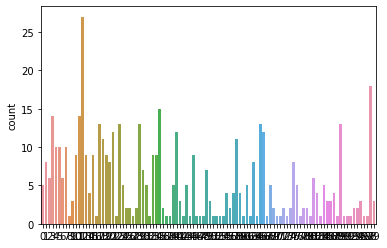

In [422]:
sns.countplot(kmeans.labels_)
plt.show()

In [ ]:
# kmeans.cluster_centers_ # 군집 중심점 좌표

In [423]:
print(kmeans.inertia_)

3320.4922628561417


In [ ]:
# dbscan = DBSCAN(eps=0.3, min_samples=2)
# dbscan.fit(df_total_v2_norm.loc[:, 'Tempo':])
# dbscan.labels_

In [424]:
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(df_total_v2_norm.loc[:, 'Tempo':'Chroma_stft12_var'])

In [425]:
pca.explained_variance_ratio_

array([0.34949187, 0.10926576])

In [426]:
np.sum(pca.explained_variance_ratio_)

0.4587576291213388

In [427]:
df_pca_result = pd.DataFrame(pca_result, columns=[f'PCA_component_{i+1}' for i in range(len(pca.components_))])
df_pca_result.head()

,PCA_component_1,PCA_component_2
0,-1.302896,-0.298108
1,-3.972542,-0.685004
2,-2.755990,0.594078
3,-3.724269,-0.394452
4,-1.534315,1.695489


In [447]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(df_pca_result)

df_pca_result['Cluster'] = kmeans.labels_

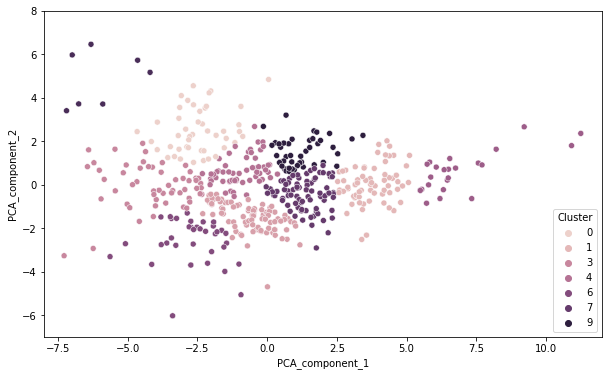

In [448]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_pca_result['PCA_component_1'], y=df_pca_result['PCA_component_2'], hue=df_pca_result['Cluster'])
# plt.xlim(-10000, 25000)
# plt.ylim(-4000, 6000)
plt.xlim(-8, 12)
plt.ylim(-7, 8)
plt.show()

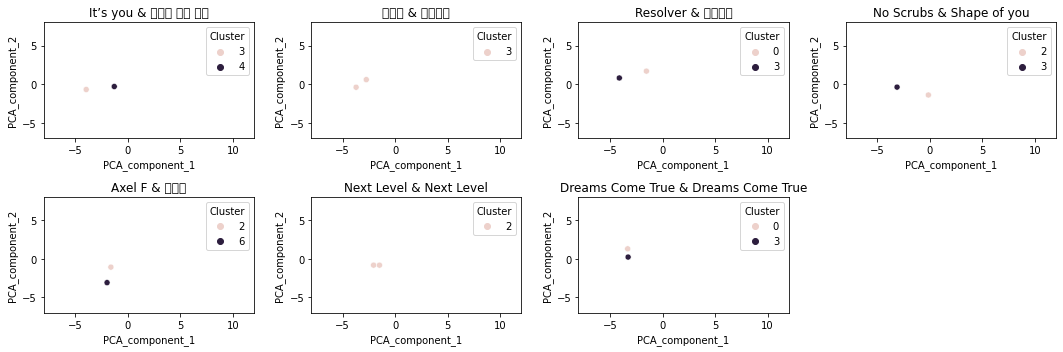

In [449]:
plt.figure(figsize=(15,5))

for i in range(7):
  plt.subplot(2, 4, i+1)
  df = df_pca_result.loc[i*2:i*2+1, :]
  sns.scatterplot(x=df['PCA_component_1'], y=df['PCA_component_2'], hue=df['Cluster'])
  # plt.xlim(-10000, 25000)
  # plt.ylim(-4000, 6000)
  plt.xlim(-8, 12)
  plt.ylim(-7, 8)
  plt.title(f'{df_kmeans_v2.loc[i*2,"Music"].split(" - ")[1]} & {df_kmeans_v2.loc[i*2+1,"Music"].split(" - ")[1]}')

# plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.show()

#### 음원 들어보기

In [450]:
df_kmeans_v2.head(14)

,Music,Path,Cluster_kmeans
0,더더 - It’s you,/content/drive/MyDrive/ds_study/DL_project2/te...,76
1,MC몽 - 너에게 쓰는 편지,/content/drive/MyDrive/ds_study/DL_project2/te...,20
2,와이낫 - 파랑새,/content/drive/MyDrive/ds_study/DL_project2/te...,4
3,씨엔블루 - 외톨이야,/content/drive/MyDrive/ds_study/DL_project2/te...,4
4,요시마타 료 - Resolver,/content/drive/MyDrive/ds_study/DL_project2/te...,4
5,FTISLAND - 사랑앓이,/content/drive/MyDrive/ds_study/DL_project2/te...,4
6,TLC - No Scrubs,/content/drive/MyDrive/ds_study/DL_project2/te...,15
7,Ed Sheeran - Shape of you,/content/drive/MyDrive/ds_study/DL_project2/te...,95
8,Harold Faltermeyer - Axel F,/content/drive/MyDrive/ds_study/DL_project2/te...,33
9,싸이 - 챔피언,/content/drive/MyDrive/ds_study/DL_project2/te...,10


In [451]:
df_kmeans_v2[df_kmeans_v2['Cluster_kmeans'] == 2].head()

,Music,Path,Cluster_kmeans
11,에스파 - Next Level,/content/drive/MyDrive/ds_study/DL_project2/te...,2
106,Music_395,/content/drive/MyDrive/ds_study/DL_project2/da...,2
145,Music_566,/content/drive/MyDrive/ds_study/DL_project2/da...,2
379,Music_1727,/content/drive/MyDrive/ds_study/DL_project2/da...,2
427,Music_1894,/content/drive/MyDrive/ds_study/DL_project2/da...,2


In [455]:
ipd.Audio(df_kmeans_v2[df_kmeans_v2['Cluster_kmeans'] == 2].loc[145, 'Path'], rate=44100)

#### GMM

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gmm = GaussianMixture(n_components=200, random_state=42)
gmm_labels = gmm.fit_predict(df_total_v2_norm.loc[:, 'Tempo':])

df_gmm_v2 = df_total_v2_norm.loc[:, :'Path']
df_gmm_v2['Cluster_gmm'] = gmm_labels
df_gmm_v2.head(14)

,Music,Path,Cluster_gmm
0,더더 - It’s you,/content/drive/MyDrive/ds_study/DL_project2/te...,2
1,MC몽 - 너에게 쓰는 편지,/content/drive/MyDrive/ds_study/DL_project2/te...,103
2,와이낫 - 파랑새,/content/drive/MyDrive/ds_study/DL_project2/te...,102
3,씨엔블루 - 외톨이야,/content/drive/MyDrive/ds_study/DL_project2/te...,102
4,요시마타 료 - Resolver,/content/drive/MyDrive/ds_study/DL_project2/te...,102
5,FTISLAND - 사랑앓이,/content/drive/MyDrive/ds_study/DL_project2/te...,102
6,TLC - No Scrubs,/content/drive/MyDrive/ds_study/DL_project2/te...,2
7,Ed Sheeran - Shape of you,/content/drive/MyDrive/ds_study/DL_project2/te...,50
8,Harold Faltermeyer - Axel F,/content/drive/MyDrive/ds_study/DL_project2/te...,89
9,싸이 - 챔피언,/content/drive/MyDrive/ds_study/DL_project2/te...,188


In [ ]:
gmm = GaussianMixture(n_components=10, random_state=42)
gmm_labels = gmm.fit_predict(df_pca_result)

df_pca_result['Cluster'] = gmm_labels

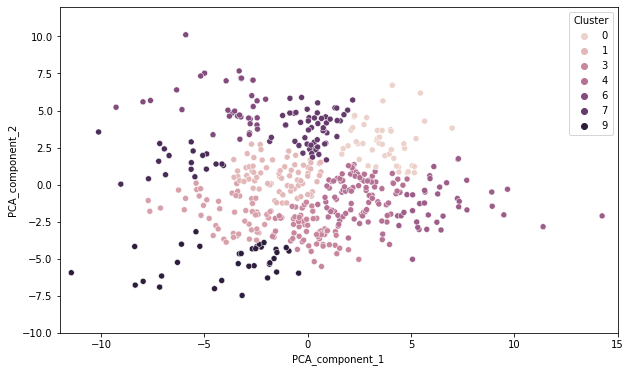

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_pca_result['PCA_component_1'], y=df_pca_result['PCA_component_2'], hue=df_pca_result['Cluster'])
# plt.xlim(-10000, 25000)
# plt.ylim(-4000, 6000)
plt.xlim(-12, 15)
plt.ylim(-10, 12)
plt.show()

# Part 3. Mel Spectrogram 활용

In [ ]:
import skimage.io

In [ ]:
# melspectrogram 시각화 함수 정의
def show_melspectrogram(music, sr):
  S = librosa.feature.melspectrogram(y=music, sr=sr)
  S_db = librosa.power_to_db(S, ref=np.max)
  seconds = len(music)/SAMPLING_RATE

  plt.figure(figsize=(15,5))
  librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
  plt.colorbar()
  plt.tight_layout()
  plt.xlabel('time')
  plt.ylabel('Hz')
  plt.xticks(np.arange(0, seconds, seconds//10)) # 좌표간격 설정
  plt.show()

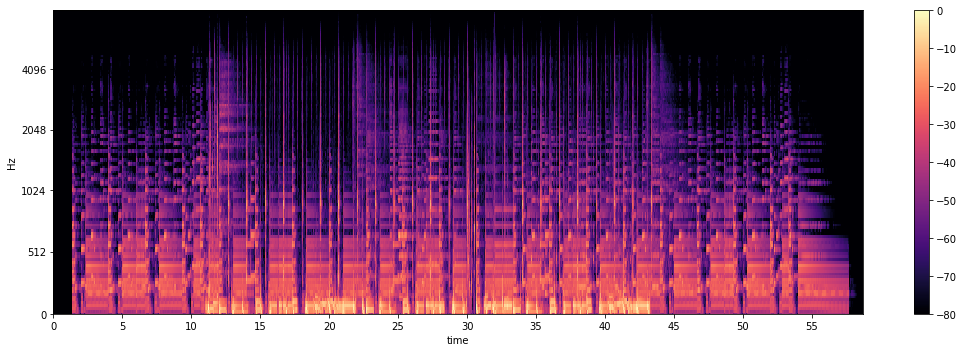

In [ ]:
show_melspectrogram(music, sr)

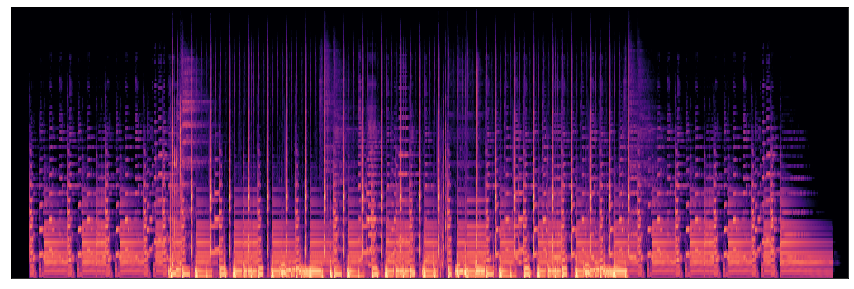

In [ ]:
S = librosa.feature.melspectrogram(y=music, sr=sr)
S_db = librosa.power_to_db(S, ref=np.max)
seconds = len(music)/SAMPLING_RATE

fig = plt.figure(figsize=(15,5))
librosa.display.specshow(S_db, sr=sr, fmax=8000)
fig.savefig(DIR_PATH + f'data_mel/test123.png')

In [ ]:
len(librosa.feature.melspectrogram(y=music, sr=sr)[0])

5059

In [ ]:
def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

def spectrogram_image(y, sr, filename):
    # use log-melspectrogram
    mels = librosa.feature.melspectrogram(y=music, sr=sr)
    mels = np.log(mels + 1e-9) # add small number to avoid log(0)

    # min-max scale to fit inside 8-bit range
    img = scale_minmax(mels, 0, 255).astype(np.uint8)
    img = np.flip(img, axis=0) # put low frequencies at the bottom in image
    img = 255-img # invert. make black==more energy

    # save as PNG
    skimage.io.imsave(DIR_PATH + f'data_mel/{filename}', img)

    return img

In [ ]:
test = spectrogram_image(music, sr, 'test.png')

In [ ]:
len(test[0])

5059

In [ ]:
import librosa
import numpy
import skimage.io

def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

def spectrogram_image(y, sr, out, hop_length, n_mels):
    # use log-melspectrogram
    mels = librosa.feature.melspectrogram(y=music, sr=sr)
    mels = numpy.log(mels + 1e-9) # add small number to avoid log(0)

    # min-max scale to fit inside 8-bit range
    img = scale_minmax(mels, 0, 255).astype(numpy.uint8)
    img = numpy.flip(img, axis=0) # put low frequencies at the bottom in image
    img = 255-img # invert. make black==more energy

    # save as PNG
    skimage.io.imsave(out, img)


if __name__ == '__main__':
    # settings
    hop_length = 512 # number of samples per time-step in spectrogram
    n_mels = 128 # number of bins in spectrogram. Height of image
    time_steps = 384 # number of time-steps. Width of image

    # load audio. Using example from librosa
    path = librosa.util.example_audio_file()
    y, sr = librosa.load(path, offset=1.0, duration=10.0, sr=22050)
    out = 'out.png'

    # extract a fixed length window
    start_sample = 0 # starting at beginning
    length_samples = time_steps*hop_length
    window = y[start_sample:start_sample+length_samples]
    
    # convert to PNG
    spectrogram_image(window, sr=sr, out=out, hop_length=hop_length, n_mels=n_mels)
    print('wrote file', out)